<div style="background-color: #bfd630; font-family: Calibir, sans-serif; padding: 20px;">



   <div style="text-align: center;">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 120px; margin-top: 20px; margin-bottom: 60px;">
   </div>

   <div style="text-align: center; font-size: 24px; font-weight: bold; font-family: Calibir; color: #000000; margin-bottom: 10px;">
      Machine Learning Project | To Grant or Not to Grant
   </div>
   
   <div style="text-align: center; font-family: Calibir; font-size: 22px; color: #000000; font-weight: bold; margin-bottom: 20px;">
      1. Exploratory Analysis
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibir; font-weight: bold; color: #333333; margin-bottom: 5px;">
      Nova Information Management School
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibir; font-weight: bold; color: #333333; margin-bottom: 20px;">
      Universidade Nova de Lisboa
   </div>
        <div style="text-align: center; font-size: 16px; font-family: Calibir; font-weight: bold; color: #333333; margin-bottom: 10px;">
      Master in Data Science and Advanced Analytics
   </div>
 
   <div style="text-align: center;">
      <img src="https://cdn.prod.website-files.com/617accb8b04ef2b3feffa61b/6581e90d485a9976c3576a46_how-does-workers-comp-work.jpg" style="width: 350px; margin-top: 20px; margin-bottom: 60px;">
   </div>




   <div style="text-align: center; font-family: Calibir; font-size: 16px; color: #333333; font-weight: bold; margin-bottom: 20px;">
      Project Group: 32
   </div>

   <div style="text-align: center; font-family: Calibir; font-size: 16px; color: #333333; margin-bottom: 40px">
      Filipa Pereira -  20240509 <br>
      Klimentina Gilevska -  20240747 <br>
      Maria Assunção -  20211605 <br>
      Rita Matos -  20211642 <br>
      Rita Wang -  20240551 <br>
      Sven Goerdes -  20240503
   </div>

   <div style="text-align: center; font-family: Calibir; font-size: 16px; color: #333333; margin-bottom: 10px">
      Fall/Spring Semester 2024-2025
   </div>

  <div style="text-align: center; font-family: Calibir; font-size: 16px; color: #333333; margin-bottom: 20px;">
      11th November 2024
   </div>

   
</div>
|

## 1. Importing Libraries and Dataset

In [69]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../helper_functions')
from helper_functions import missing_data

#Just to ignore the color warnings about future updates
import warnings
from matplotlib import MatplotlibDeprecationWarning 
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

In [70]:
wcb = pd.read_csv('../project_data/train_data.csv', delimiter=',',dtype={'Zip Code': str})

## 2. Data Exploration

In [71]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [72]:
missing_data(wcb)

Missing Count  Missing %
OIICS Nature of Injury Description         593471     100.00
IME-4 Count                                460668      77.62
First Hearing Date                         442673      74.59
C-3 Date                                   406226      68.45
Birth Year                                  48523       8.18
Average Weekly Wage                         48096       8.10
Zip Code                                    48082       8.10
WCIO Part Of Body Description               36527       6.15
WCIO Part Of Body Code                      36527       6.15
WCIO Nature of Injury Description           35102       5.91
WCIO Nature of Injury Code                  35102       5.91
WCIO Cause of Injury Code                   35085       5.91
WCIO Cause of Injury Description            35085       5.91
C-2 Date                                    34005       5.73
Industry Code                               29403       4.95
Industry Code Description                   29403       4.95
Accident Date                               23134       3.90
Agreement Reached                           19445       3.28
WCB Decision                                19445       3.28
Gender                                      19445       3.28
Medical Fee Region                          19445       3.28
Age at Injury                               19445       3.28
District Name                               19445       3.28
COVID-19 Indicator                          19445       3.28
County of Injury                            19445       3.28
Claim Injury Type                           19445       3.28
Carrier Type                                19445       3.28
Carrier Name                                19445       3.28
Attorney/Representative                     19445       3.28
Alternative Dispute Resolution              19445       3.28
Number of Dependents                        19445       3.28

__Note__: We will exclude the <code>OIICS Nature of Injury Description</code> and <code>WCB Decision</code> columns from our analysis. The first column contains only missing values, while the second is constant across the dataset.

In [73]:
#Code needed to run the vizualizations
wcb = pd.read_csv('../project_data/train_data.csv', delimiter=',', low_memory=False)

dates = ['Accident Date','Assembly Date','C-2 Date','C-3 Date','First Hearing Date','Assembly Date']
for date in dates:
    wcb[date] = pd.to_datetime(wcb[date], errors='coerce')

categorical = wcb.select_dtypes(include=['object', 'category']).columns.tolist()
numerical = wcb.select_dtypes(include=['number']).columns.tolist()

colors = [
    'purple',
    'lightblue',  
    'lightgray',  
    'salmon',
    'darkred',   
    'orange',
    'blue',   
    'black'   
]

### 2.1. Comprehensive Analysis of Each Datetime Variable<a class="anchor" id="numerical-t"></a>
[Back to ToC](#toc)

### <code>Accident Date</code> 

In [74]:
wcb_filtered_accident = wcb[wcb['Accident Date'].dt.year >= 2000]
daily_counts_accident = wcb_filtered_accident['Accident Date'].value_counts().sort_index()

# Line Chart
sns.set_theme()
plt.figure(figsize=(20, 10))
plt.plot(daily_counts_accident.index, daily_counts_accident.values, label='Accident Date')
plt.title('Frequency of Accident Date per Day (2000 onwards)')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.show()

>Almost all accidents are reported between 2020 and 2024, with the highest peak occurring in 2020, likely due to the pandemic. However, there is also a noticeable spike in reported accidents in 2001, which may be related to the events surrounding the fall of the Twin Towers.

### <code>First Hearing Date</code> 

In [75]:
daily_counts = wcb['First Hearing Date'].value_counts().sort_index()

# Line Chart
sns.set_theme()
plt.figure(figsize=(20, 10))
daily_counts.plot(kind='line', title='Frequency of First Hearing Date per Day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

>The dates for the first hearing held are concentrated in recent years. The number of first hearing dates has generally increased from 2020 up until the first months of 2023. There is an apparent dip between the middle of 2022 and the beginning of 2023.

### <code>Assembly Date</code> 

In [76]:
daily_counts_assembly = wcb['Assembly Date'].value_counts().sort_index()

# Line Chart for Assembly Date
sns.set_theme()
plt.figure(figsize=(20, 10))
plt.plot(daily_counts_assembly.index, daily_counts_assembly.values, label='Assembly Date')
plt.title('Frequency of Assembly Date per Day')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.show()

>Apart from an apparent drop in 2020, the date when the claim was first assembled appears to be consistent across the years.

### <code>C-2 Date</code> and <code>C-3 Date</code> 

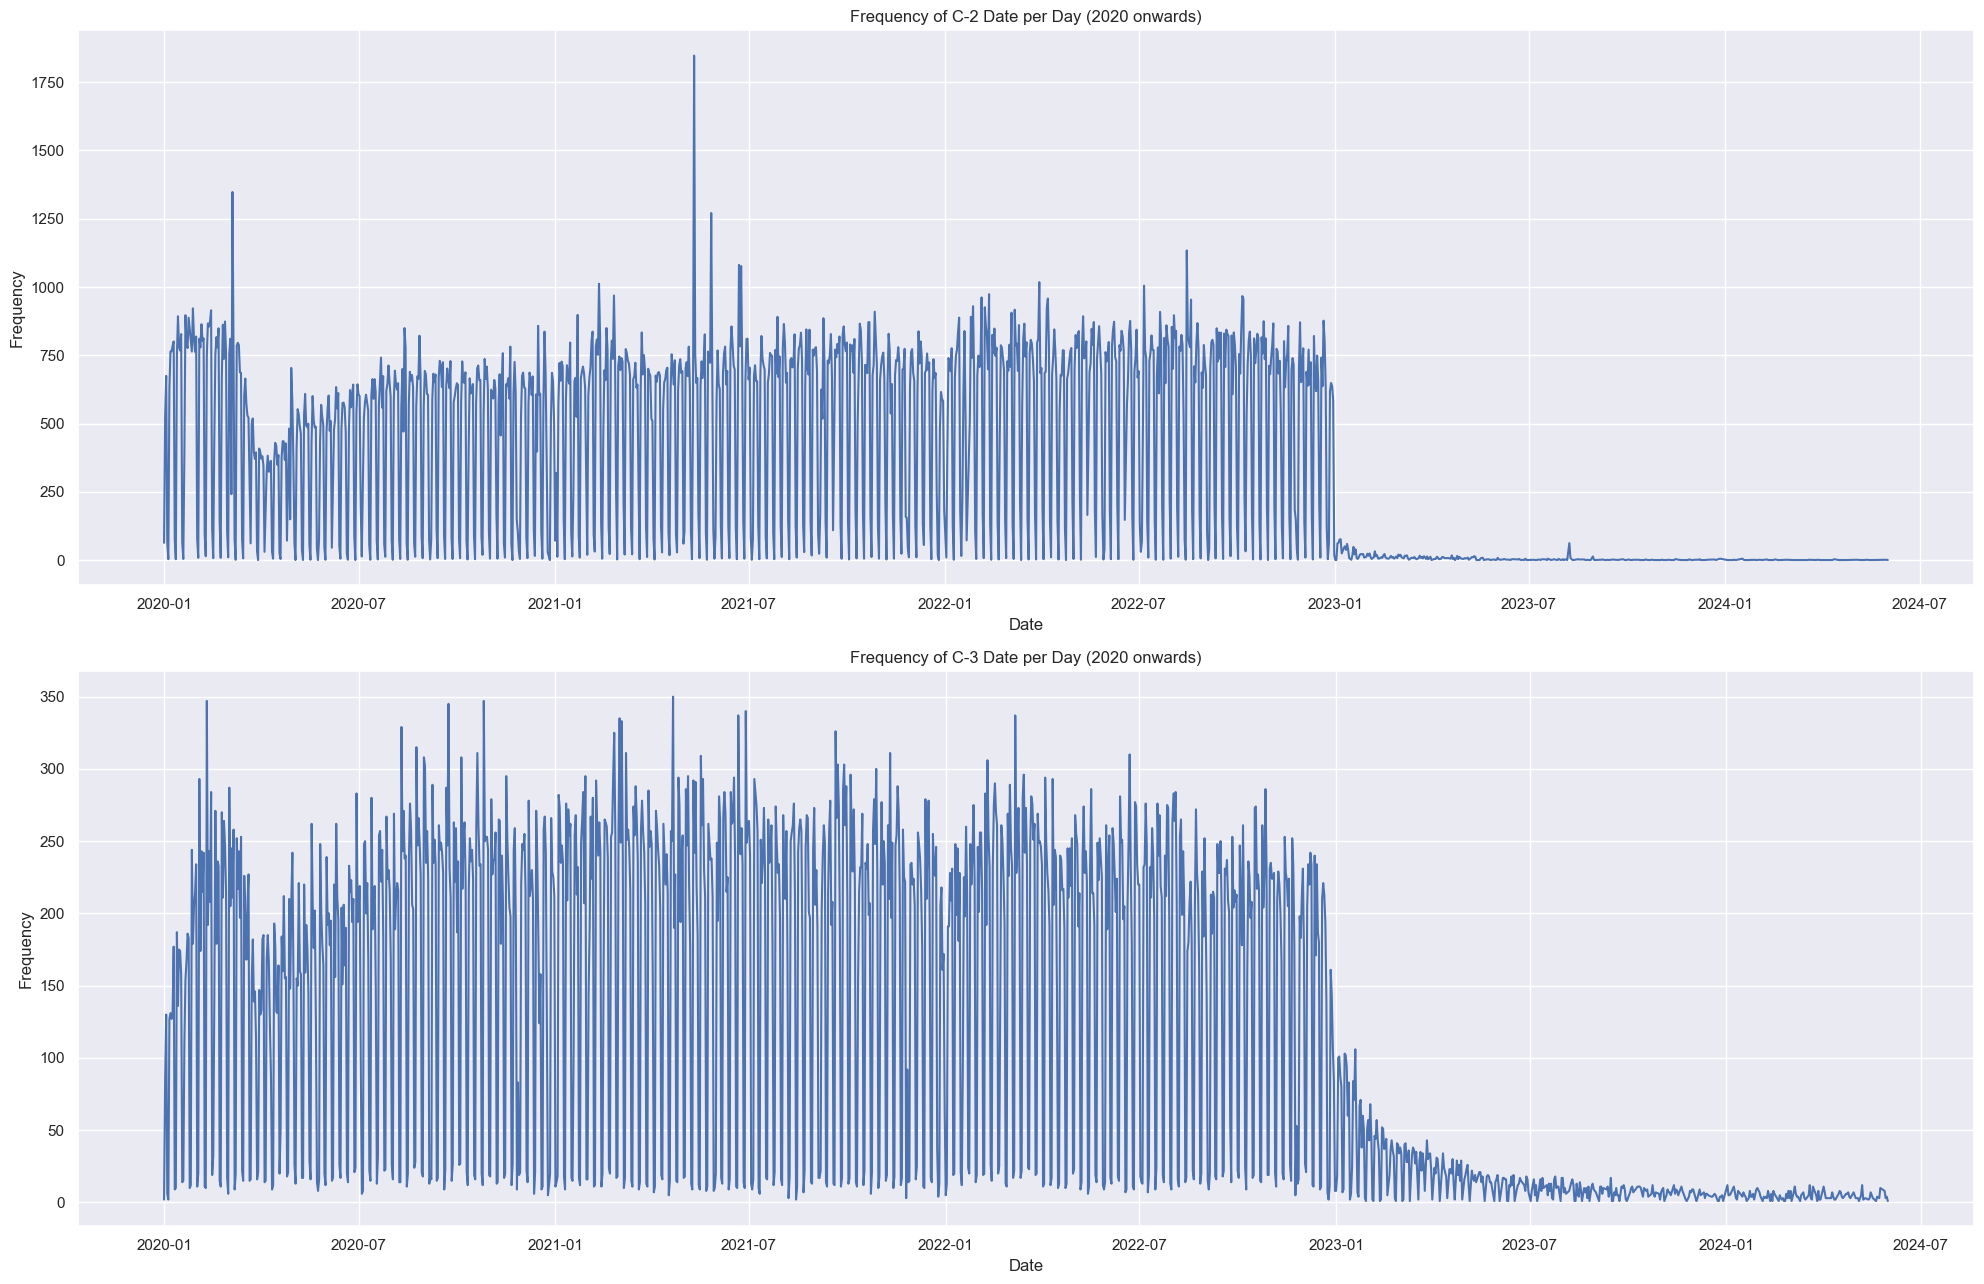

In [77]:
wcb_filtered_c2 = wcb[wcb['C-2 Date'].dt.year >= 2020]
wcb_filtered_c3 = wcb[wcb['C-3 Date'].dt.year >= 2020]

date_columns = {
    'C-2 Date': wcb_filtered_c2,  
    'C-3 Date': wcb_filtered_c3  
}
sns.set_theme()
fig, axes = plt.subplots(2, 1, figsize=(20, 13))

for i, (column, data) in enumerate(date_columns.items()):
    daily_counts = data[column].value_counts().sort_index()
    axes[i].plot(daily_counts.index, daily_counts.values, label=column)
    axes[i].set_title(f'Frequency of {column} per Day (2020 onwards)')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

> Both the Employer's Report of Work-Related Injuries (Form C-2) and the Employee Claim Form (Form C-3) show a sharp decline after 2023. We can see that the drop is consistent with every other datetime variable in our dataset, including <code>Accident Date</code>, <code>First Hearing Date</code>, and <code>Assembly Date</code> .

### 2.2. Comprehensive Analysis of Each Numerical Variable<a class="anchor" id="numerical-t"></a>
[Back to ToC](#toc)

In [78]:
wcb[numerical].describe().T

count          mean           std  \
Age at Injury                       574026.0  4.211427e+01  1.425643e+01   
Average Weekly Wage                 545375.0  4.910883e+02  6.092918e+03   
Birth Year                          544948.0  1.886768e+03  4.146444e+02   
Claim Identifier                    593471.0  2.366760e+07  1.079271e+08   
IME-4 Count                         132803.0  3.207337e+00  2.832303e+00   
Industry Code                       564068.0  5.864531e+01  1.964417e+01   
OIICS Nature of Injury Description       0.0           NaN           NaN   
WCIO Cause of Injury Code           558386.0  5.438114e+01  2.587428e+01   
WCIO Nature of Injury Code          558369.0  4.101384e+01  2.220752e+01   
WCIO Part Of Body Code              556944.0  3.973815e+01  2.236594e+01   
Agreement Reached                   574026.0  4.666513e-02  2.109208e-01   
Number of Dependents                574026.0  3.006559e+00  2.000801e+00   

                                          min        25%        50%  \
Age at Injury                             0.0       31.0       42.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1965.0     1977.0   
Claim Identifier                    5393066.0  5593414.5  5791212.0   
IME-4 Count                               1.0        1.0        2.0   
Industry Code                            11.0       45.0       61.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
WCIO Cause of Injury Code                 1.0       31.0       56.0   
WCIO Nature of Injury Code                1.0       16.0       49.0   
WCIO Part Of Body Code                   -9.0       33.0       38.0   
Agreement Reached                         0.0        0.0        0.0   
Number of Dependents                      0.0        1.0        3.0   

                                          75%          max  
Age at Injury                            54.0        117.0  
Average Weekly Wage                     841.0    2828079.0  
Birth Year                             1989.0       2018.0  
Claim Identifier                    5991000.5  999891667.0  
IME-4 Count                               4.0         73.0  
Industry Code                            71.0         92.0  
OIICS Nature of Injury Description        NaN          NaN  
WCIO Cause of Injury Code                75.0         99.0  
WCIO Nature of Injury Code               52.0         91.0  
WCIO Part Of Body Code                   53.0         99.0  
Agreement Reached                         0.0          1.0  
Number of Dependents                      5.0          6.0

### <code>Average Weekly Wage</code> 

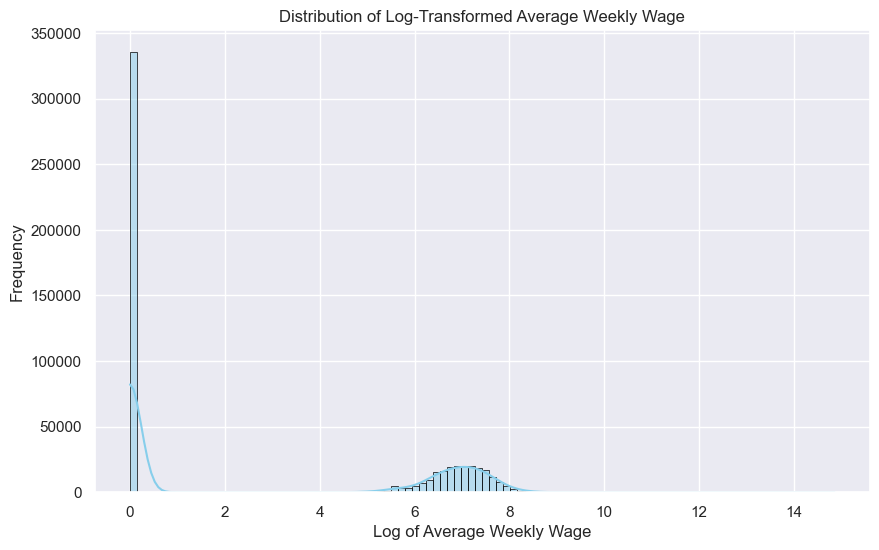

In [79]:
wage_data = wcb['Average Weekly Wage']
log_wage_data = np.log(wage_data + 1)

sns.set_theme()
plt.figure(figsize=(10, 6))
sns.histplot(log_wage_data, bins=100, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Log of Average Weekly Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Average Weekly Wage')
plt.show()

>Due to extreme outliers, we log-scaled the x-axis.
In addition, for clearer visualization, we will disregard the zeros in the following graph.

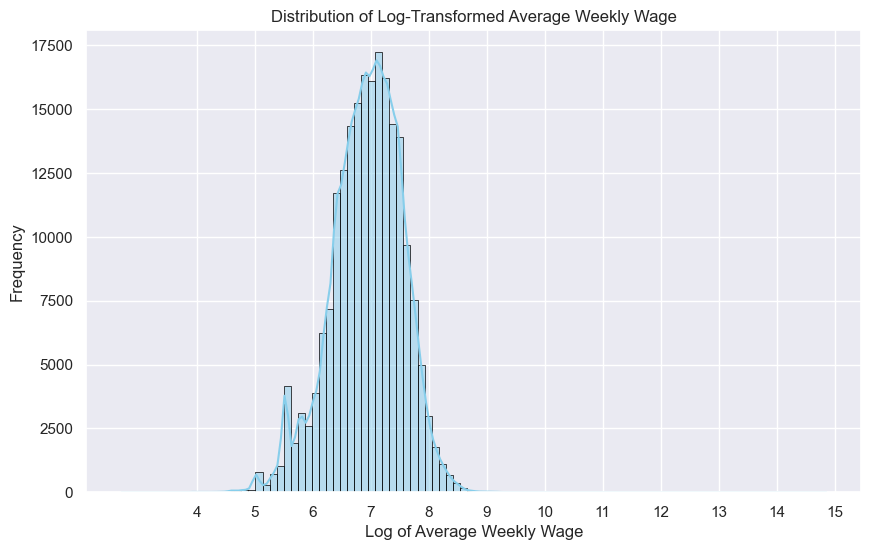

In [80]:
wage_data = wcb['Average Weekly Wage']
wage_data_filtered = wage_data[wage_data > 3]
log_wage_data = np.log(wage_data_filtered + 1)
sns.set_theme()
plt.figure(figsize=(10, 6))
plt.xticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
sns.histplot(log_wage_data, bins=100, kde=True, color='skyblue', edgecolor='black')

plt.xlabel('Log of Average Weekly Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Average Weekly Wage')
plt.show()

> Due to the logarithmic transformation, it is possible that the graph looks more bell-shaped than it actually is.

> We can see that the Average Weekly Wage follows a normal-like distribution, with its peak at approximately 7.2 (e^7.2) or `1,339$`.

> Most of the wages are approximately between `403$` and `2,981$`.

> There are extreme values on both sides: beyond log values of 4 (about `55$`) and 10 (about `22,026$`). This indicates that very low wages (near zero) and extremely high wages (outliers) are present but rare in this dataset. \
> Apart from the missing values, there are a lot of zeros in Average Weekly Wage, and as we can see the median is zero and the mean is influenced by outliers, we could consider imputing with the median of the non-zero values or predictive imputing, maybe based on the Industry Code.


### <code>Birth Year</code> 

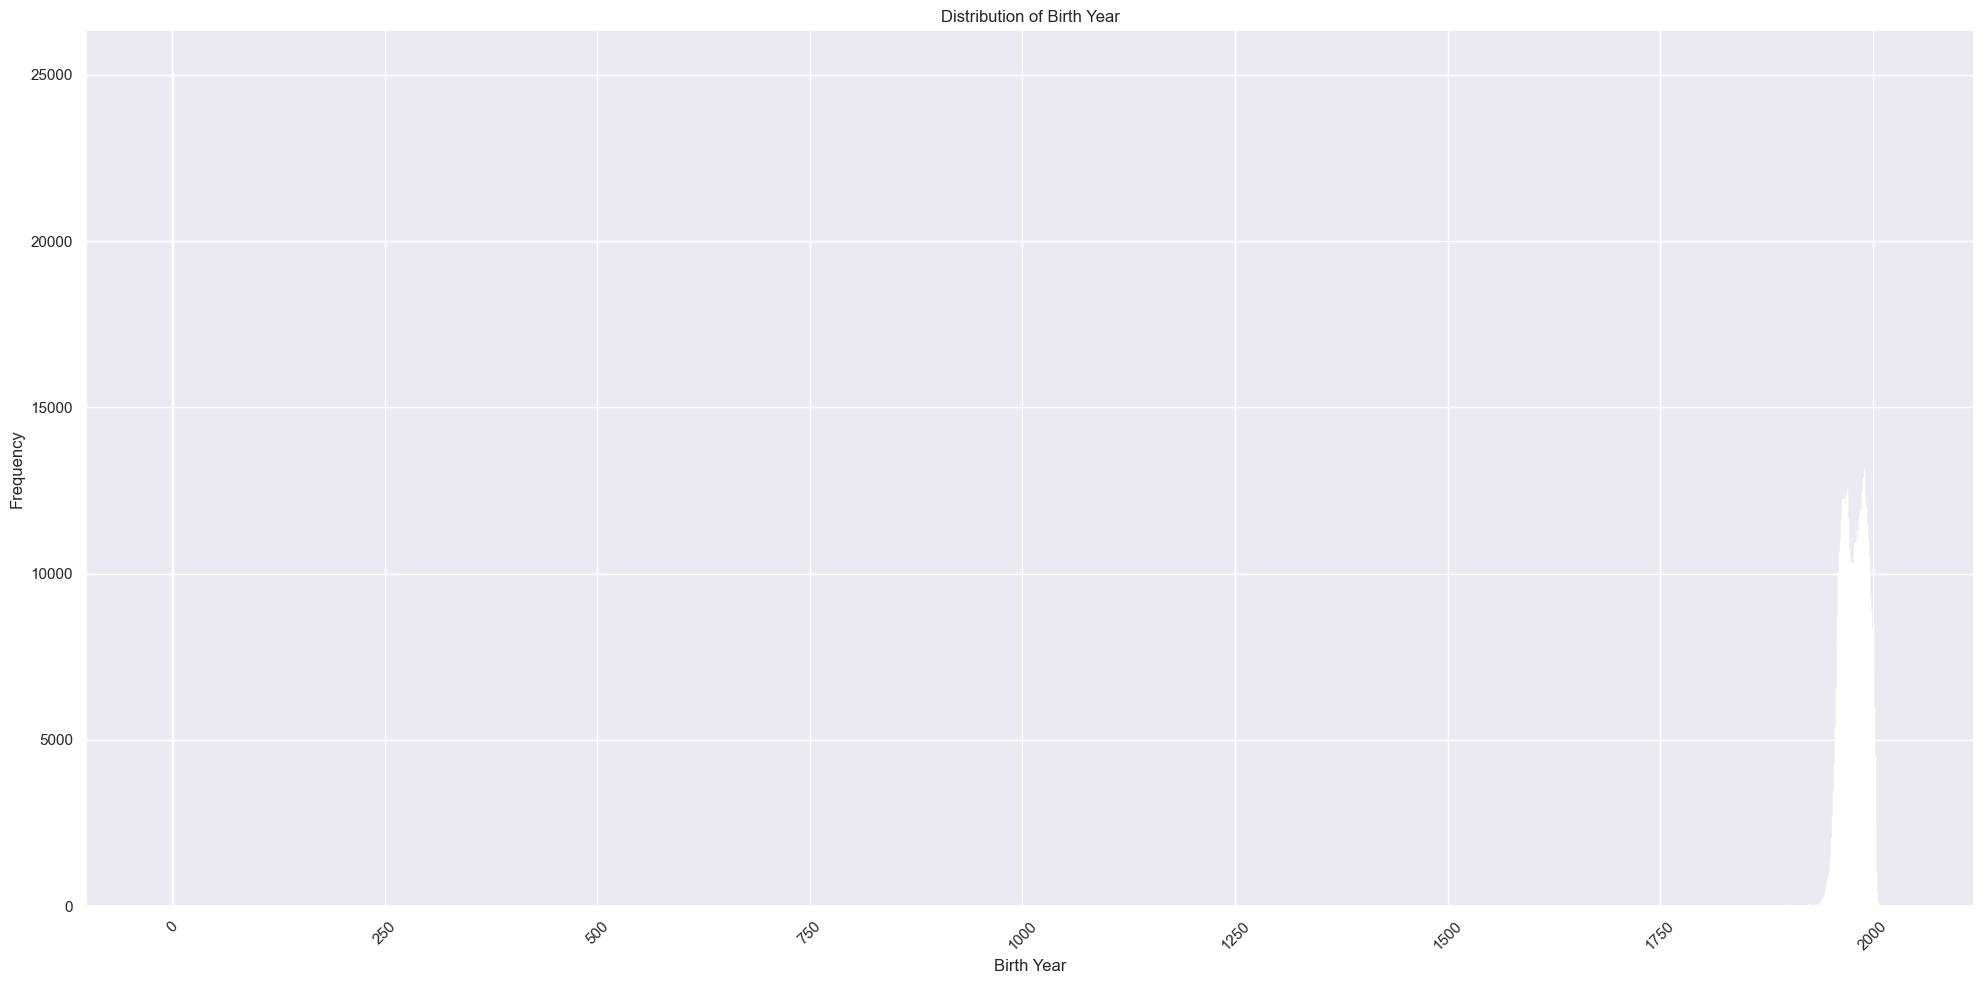

In [81]:
birth_year_counts = wcb['Birth Year'].value_counts().sort_index()

# Bar plot for Birth Year

plt.figure(figsize=(20,10))
plt.bar(birth_year_counts.index, birth_year_counts.values, color = "skyblue")
plt.title("Distribution of Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

> For clearer visualization, we will disregard the zeros in the following graph below.

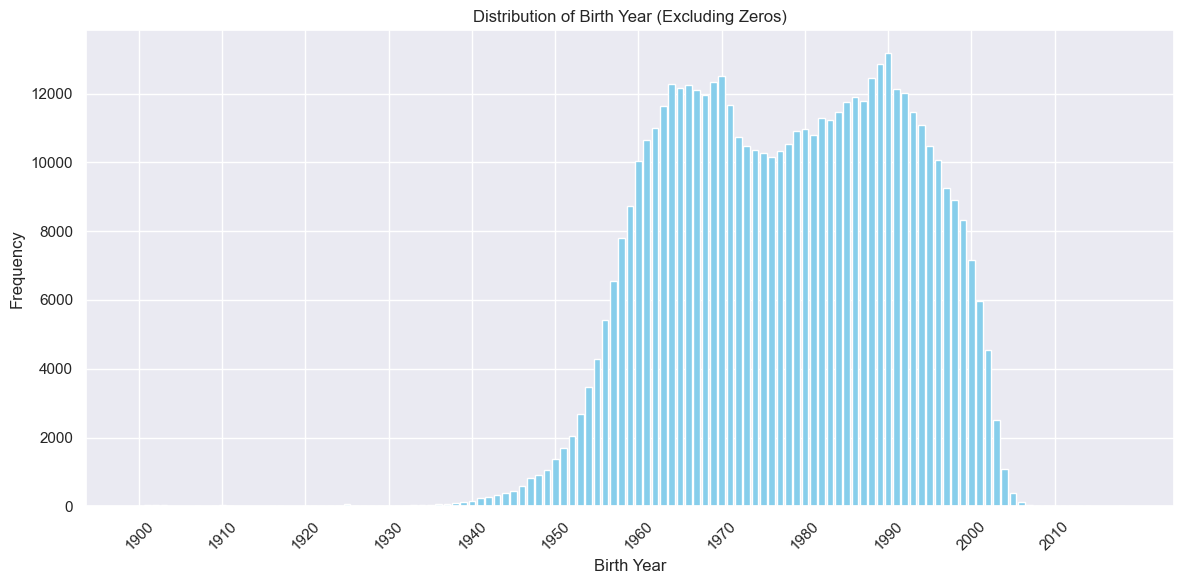

In [82]:
birth_year_counts_filtered = wcb[wcb['Birth Year'] != 0]['Birth Year'].value_counts().sort_index()

# Bar plot for Birth Year
sns.set_theme()
plt.figure(figsize=(12, 6))
plt.bar(birth_year_counts_filtered.index, birth_year_counts_filtered.values, color="skyblue")
plt.title("Distribution of Birth Year (Excluding Zeros)")
plt.xlabel("Birth Year")
plt.ylabel("Frequency")

min_year = int(birth_year_counts_filtered.index.min())
max_year = int(birth_year_counts_filtered.index.max())
plt.xticks(range(min_year, max_year + 1, 10), rotation=45)

plt.tight_layout()
plt.show()

> Most of the claimants are born between the years 1950 and 2000 suggesting that people in their 20s to 70s (as of the present) are the most frequent claimants. However, we can notice extreme outliers on the lower bound, reaching up to the year 1900. \
> There is a steep decline of claimants born approximately after the year 1992. 

### <code>Age at Injury</code> 

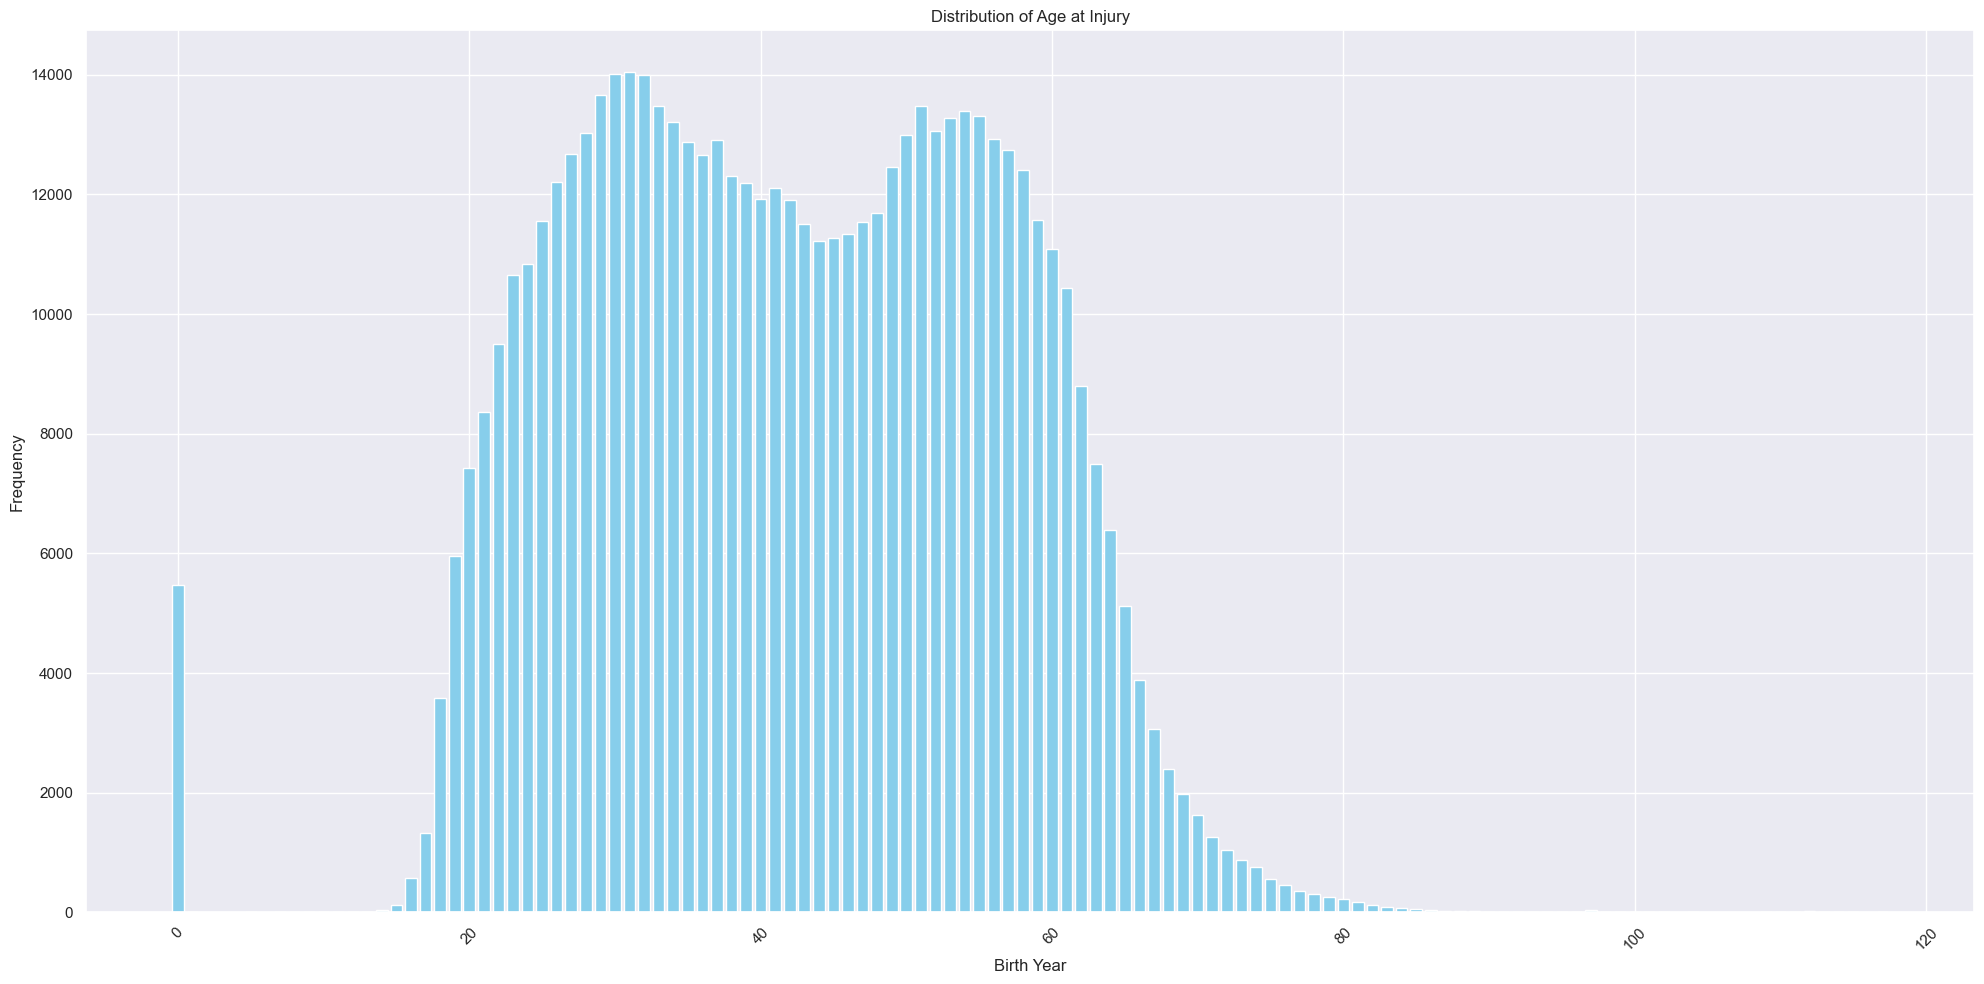

In [83]:
age_injury_counts = wcb['Age at Injury'].value_counts().sort_index()

# Bar plot for Birth Year
sns.set_theme()
plt.figure(figsize=(20, 10))
plt.bar(age_injury_counts.index, age_injury_counts.values, color = "skyblue")
plt.title("Distribution of Age at Injury")
plt.xlabel("Birth Year")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

> To keep the integrity and minimize data preprocessing in this stage, we decided to keep the missing values in this graph, since it is still vizually adequate to draw conclusions from. \
> We can confirm that the claimants in the WCB data set are mostly aged between apprximately 20 and 70 years old, when the accident occured.\
> There is a noticable dip between peple aged from 30 to 50 years old. 

### <code>IME-4 Count</code> 

In [84]:
distribution = wcb['IME-4 Count'].value_counts(normalize=True).sort_index()
threshold = 0.0001
distribution = distribution[distribution >= threshold]

# Create a single bar plot
sns.set_theme()
plt.figure(figsize=(18, 10))
sns.barplot(x=distribution.index, y=distribution.values, color="skyblue")
plt.title("Distribution of IME-4 Count (Excluding Low Proportion Values)")
plt.xlabel("IME-4 Count")
plt.ylabel("Proportion")

for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, f'{height*100:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

>Due to a lot of values with a proportion lower than 0.01%, we decided to use that as a threshold for this vizualization.\
> In 30.2% of claims only one IME-4 form was presented and in 26% only two. We have a significant drop of cases that received three IME-4 forms and the perfecntages continue to decline with every IME-4 form added. 

### 2.3. Comprehensive Analysis of Each Categorical Variable<a class="anchor" id="numerical-t"></a>
[Back to ToC](#toc)

In [85]:
wcb[categorical].describe(include='all').T

count unique  \
Alternative Dispute Resolution     574026      3   
Attorney/Representative            574026      2   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
Claim Injury Type                  574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           545389   8286   
WCB Decision                       574026      1   

                                                                 top    freq  
Alternative Dispute Resolution                                     N  571412  
Attorney/Representative                                            N  392291  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
Claim Injury Type                                        2. NON-COMP  291078  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                       11236    3398  
WCB Decision                                        Not Work Related  574026

### <code>Gender</code> and <code>COVID-19 Indicator</code> 

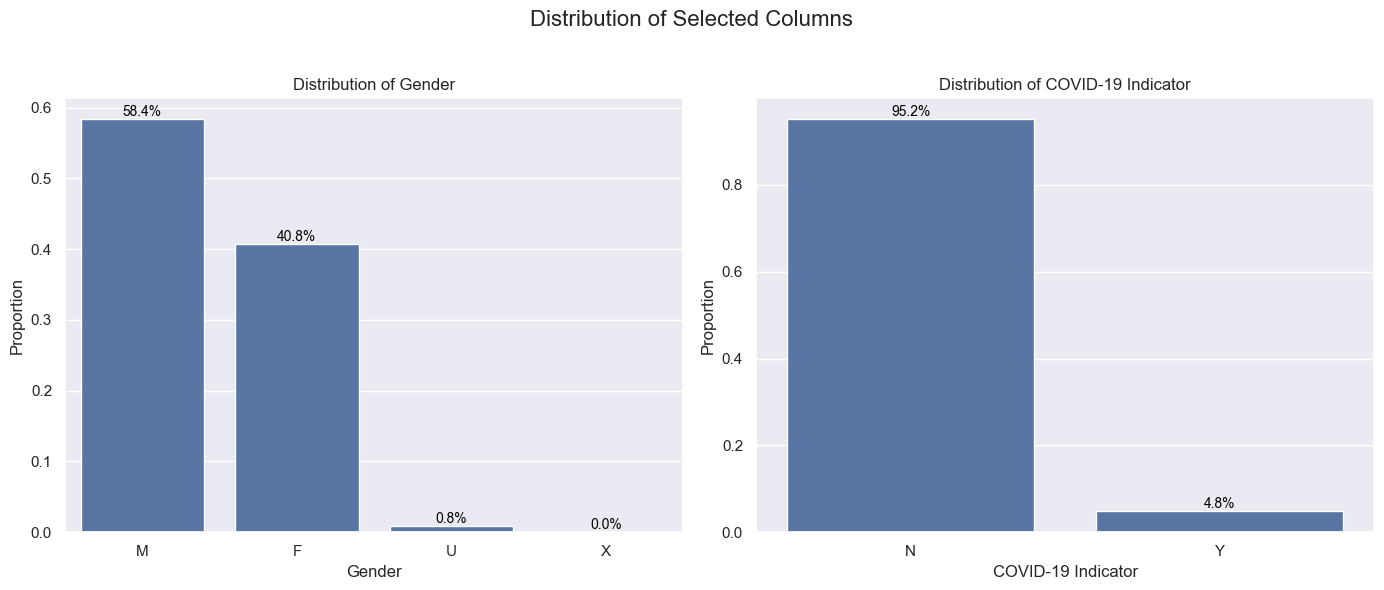

In [86]:
bar_plot_col1 = ['Gender', 'COVID-19 Indicator']
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  
fig.suptitle('Distribution of Selected Columns', fontsize=16)


for col, ax in zip(bar_plot_col1, axes.flatten()):
    distribution = wcb[col].value_counts(normalize=True)
    sns.barplot(x=distribution.index, y=distribution.values, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    for p in ax.patches:
        height = p.get_height()  
        ax.text(p.get_x() + p.get_width() / 2, height, f'{height*100:.1f}%', 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

> In the variable "Gender," there is a class imbalance with 17.6% more males than females. Additionally, 0.8% of the values are unknown.

> Only 4.8% of cases are connected to COVID-19.

### <code>Alternative Dispute Resolution</code>, <code>Attorney/Representative</code>,<code>Agreement Reached</code>, and <code>Number of Dependents</code>,

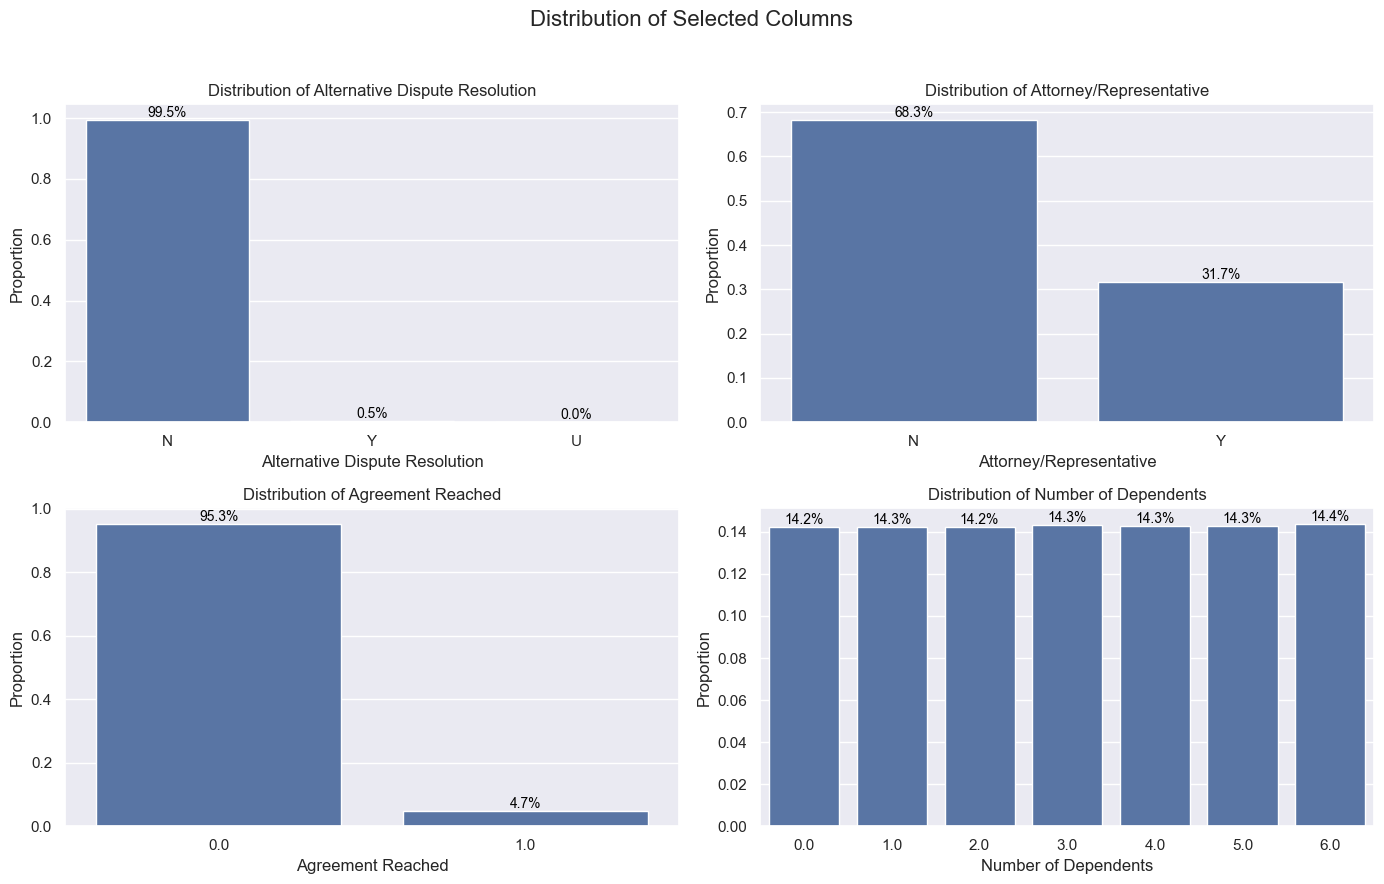

In [87]:
bar_plot_col1 = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Agreement Reached', 'Number of Dependents']

sns.set_theme()
fig, axes = plt.subplots(2, 2, figsize=(14, 9))  
fig.suptitle('Distribution of Selected Columns', fontsize=16)

for col, ax in zip(bar_plot_col1, axes.flatten()):
    distribution = wcb[col].value_counts(normalize=True)
    sns.barplot(x=distribution.index, y=distribution.values, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    for p in ax.patches:
        height = p.get_height()  
        ax.text(p.get_x() + p.get_width() / 2, height, f'{height*100:.1f}%', 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

>Three out of four variables show a high class imbalance, while the variable 'Number of Dependents' is consistent throughout its values.

>Almost all cases (99.5%) go through the Board, highlighting how rarely injured worker claims bypass the standard WCB adjudication process.

>There is a notable presence of cases where an attorney or representative was present (31.7%).

>Only 4.7% of claims had an agreement reached outside of the WCB.

>The number of dependents is evenly distributed across all claims (uniform distribution) with a range between 14.2% and 14.4%.

### <code>Carrier Type</code>, <code>Claim Injury Type</code>,<code>District Name</code>,<code>Industry Code</code>,<code>Medical Fee Region</code>

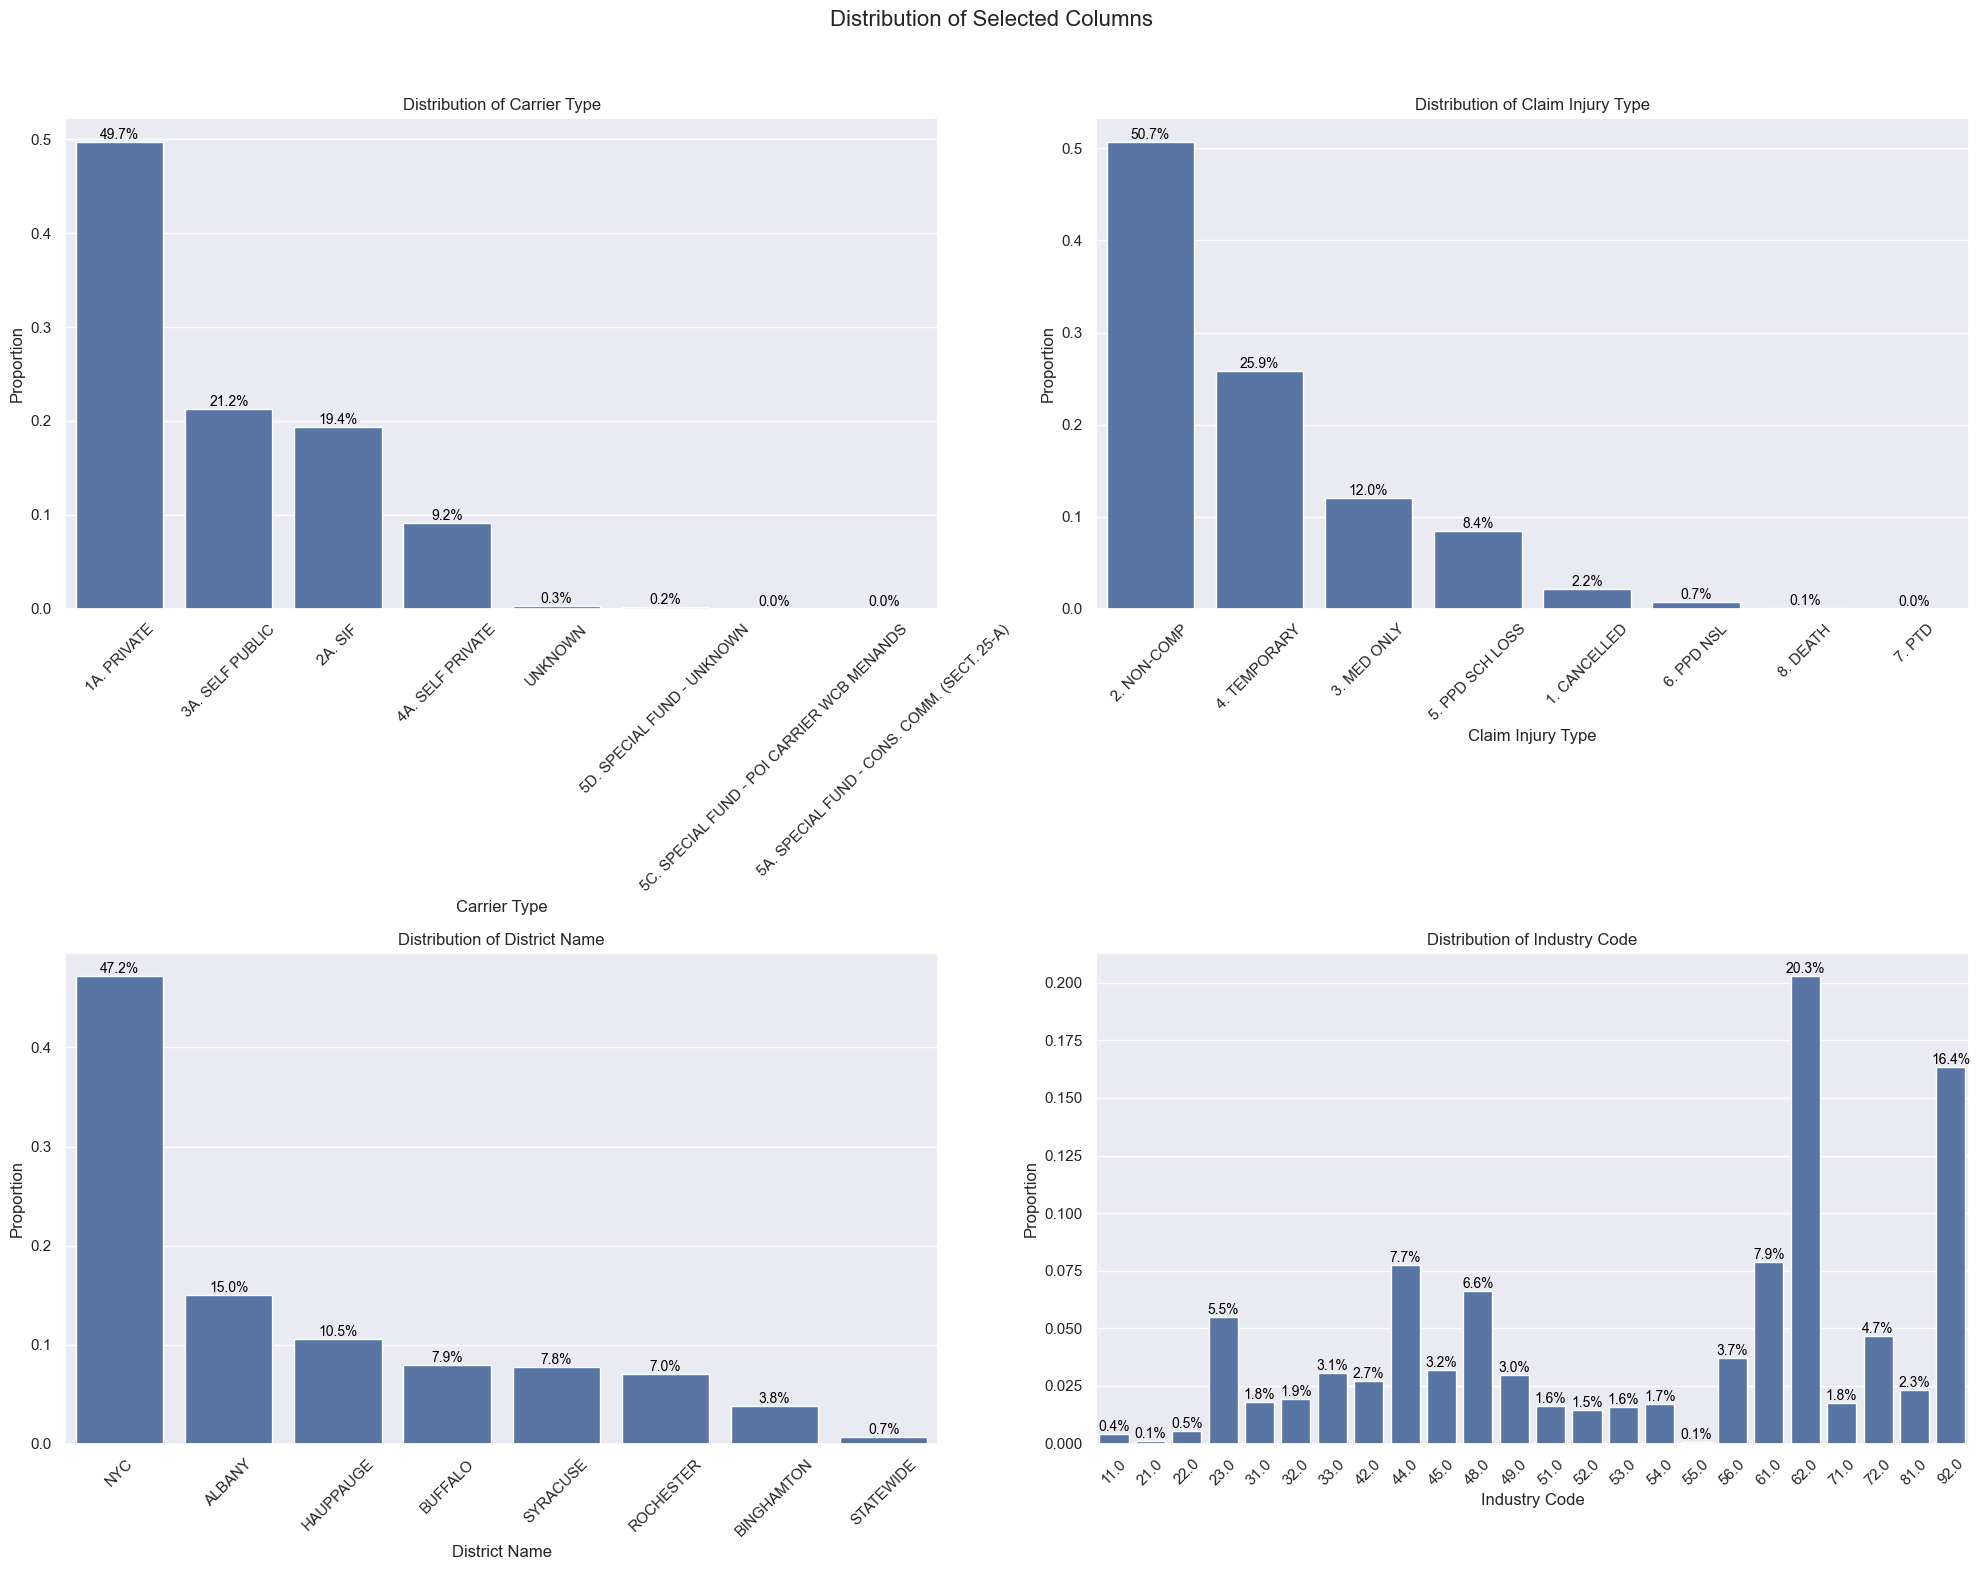

In [88]:
bar_plot_col2 = ['Carrier Type', 'Claim Injury Type', 'District Name', 'Industry Code', 'Medical Fee Region']
sns.set_theme()
fig, axes = plt.subplots(2, 2, figsize=(20, 16))  
fig.suptitle('Distribution of Selected Columns', fontsize=16)

for col, ax in zip(bar_plot_col2, axes.flatten()):
    distribution = wcb[col].value_counts(normalize=True)
    sns.barplot(x=distribution.index, y=distribution.values, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    
    # Rotate x-axis labels using tick_params
    ax.tick_params(axis='x', rotation=45)
    
    # Display percentages above bars
    for p in ax.patches:
        height = p.get_height()  
        ax.text(p.get_x() + p.get_width() / 2, height, f'{height*100:.1f}%', 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

>The most common insurance type for a claimant is Private (59.7%), followed by Self-Public (21.2%) and SIF (19.4%).

>There are 8 types of compensation for claim injuries. The most common are (NON-COMP), (TEMPORARY), and (MED-ONLY), while the rarest seem to be (DEATH) and (PTD).

>The distribution of claims by district is heavily concentrated in New York (47.2%), which makes sense given its population size. The second-largest district is Albany (15%), followed by Buffalo (7.9%).

> Certain industries, including Health Care and Social Assistance (62), Public Administration (92), Educational Services (61), Retail Trade (44), Transportation and Warehousing (48), and Construction (23), have the largest amount of data. We can assume that if there is a noticeable pattern between industry codes and the target variable, it will be reflected in these industries. On the other hand, the industries with the least data, in order, are Utilities (22), Agriculture, Forestry, Fishing and Hunting (11), Mining (21), and Management of Companies and Enterprises (55).

In [89]:
codes_to_filter = [22, 51, 92, 45, 44, 72, 55, 92]

# Loop through the codes to print the description of the first row that matches each code (we do this because we know each codes has only one description)
for code in codes_to_filter:
    description = wcb[wcb['Industry Code'] == code].iloc[0]['Industry Code Description']
    print(f"Industry Code:",code," Description:",description)

Industry Code: 22  Description: UTILITIES
Industry Code: 51  Description: INFORMATION
Industry Code: 92  Description: PUBLIC ADMINISTRATION
Industry Code: 45  Description: RETAIL TRADE
Industry Code: 44  Description: RETAIL TRADE
Industry Code: 72  Description: ACCOMMODATION AND FOOD SERVICES
Industry Code: 55  Description: MANAGEMENT OF COMPANIES AND ENTERPRISES
Industry Code: 92  Description: PUBLIC ADMINISTRATION


### <code>WCIO Cause of Injury Code</code> Distribution


In [90]:

injury_cause_counts = wcb['WCIO Cause of Injury Code'].value_counts().reset_index()
injury_cause_counts.columns = ['WCIO Cause of Injury Code', 'Frequency']


# Bar chart
sns.set_theme()
plt.figure(figsize=(20, 10))
sns.barplot(data=injury_cause_counts, x='WCIO Cause of Injury Code', y='Frequency')
plt.title('Frequency of WCIO Cause of Injury Code')
plt.xlabel('WCIO Cause of Injury Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

>The most common causes of injury are Lifting (56), Fellow Worker, Patient or Other Person (74), Strain or Injury by, NOC (60), Fall, Slip or Trip, NOC (31), On Same Level (29), Pushing or Pulling (57), Pandemic (83), and Other - Miscellaneous, NOC (99).

>The rares causes of injury are Welding Operation (7), Radiation (8), Cold Objects or Substances (11), Abnormal Air Pressure (14), Crash of Water Vehicle (40), Crash of Airplane (47), Sanding, Scraping, Cleaning Operation (67), Mold (91), Gunshot (93), Rubbed or Abraded, NOC (95), and Terrorism (96).

In [91]:
codes_to_filter = [7, 8,11,14,40,47,67,91,93,95,96]

# Loop through the codes to print the description of the first row that matches each code
for code in codes_to_filter:
    description = wcb[wcb['WCIO Cause of Injury Code'] == code].iloc[0]['WCIO Cause of Injury Description']
    print(f"Cause of Injury Code: {code} Description: {description}")

Cause of Injury Code: 7 Description: WELDING OPERATION
Cause of Injury Code: 8 Description: RADIATION
Cause of Injury Code: 11 Description: COLD OBJECTS OR SUBSTANCES
Cause of Injury Code: 14 Description: ABNORMAL AIR PRESSURE
Cause of Injury Code: 40 Description: CRASH OF WATER VEHICLE
Cause of Injury Code: 47 Description: CRASH OF AIRPLANE
Cause of Injury Code: 67 Description: SANDING, SCRAPING, CLEANING OPERATION
Cause of Injury Code: 91 Description: MOLD
Cause of Injury Code: 93 Description: GUNSHOT
Cause of Injury Code: 95 Description: RUBBED OR ABRADED, NOC
Cause of Injury Code: 96 Description: TERRORISM


### <code>WCIO Nature of Injury Code</code> Distribution


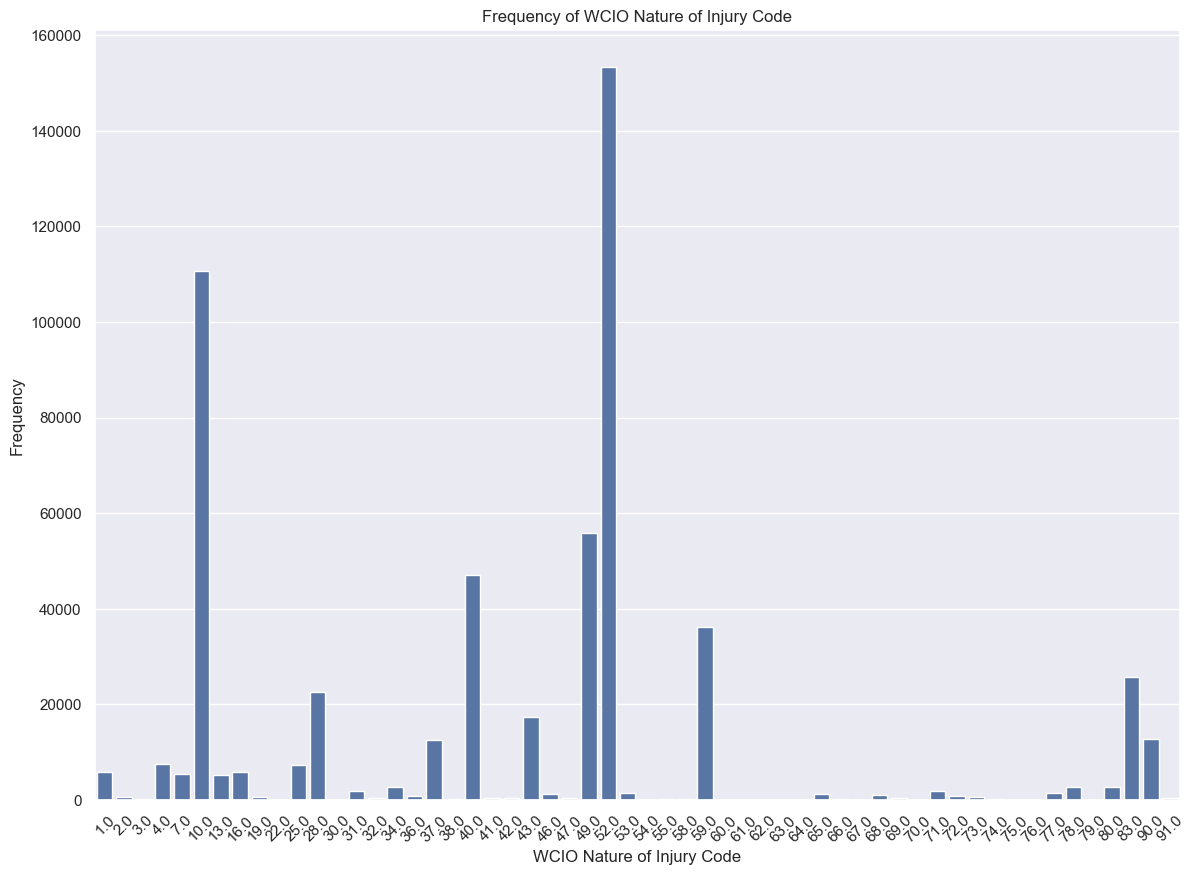

In [92]:
injury_nature_counts = wcb['WCIO Nature of Injury Code'].value_counts().reset_index()
injury_nature_counts.columns = ['WCIO Nature of Injury Code', 'Frequency']

# Bar chart
sns.set_theme()
plt.figure(figsize=(14, 10))
sns.barplot(data=injury_nature_counts, x='WCIO Nature of Injury Code', y='Frequency')
plt.title('Frequency of WCIO Nature of Injury Code')
plt.xlabel('WCIO Nature of Injury Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

>The most common injury types are Contusion (10), Sprain or Tear (49), Laceration (40), All Other Specific Injuries, NOC (59), COVID-19 (83), Fracture (28), Puncture (43), and Multiple Physical Injuries Only (90).

### <code>WCIO Nature of Injury Code</code> Distribution


In [93]:
body_part_counts = wcb['WCIO Part Of Body Code'].value_counts().reset_index()
body_part_counts.columns = ['WCIO Part Of Body Code', 'Frequency']

# Bar chart
sns.set_theme()
plt.figure(figsize=(14, 10))
sns.barplot(data=body_part_counts, x='WCIO Part Of Body Code', y='Frequency')
plt.title('Frequency of WCIO Part Of Body Code')
plt.xlabel('WCIO Part Of Body Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

>The most common injured body parts are Lower Back Area (42), Knee (53), Multiple (–9), Shoulder(s) (38), Finger(s) (36), Hand (35), Wrist (34), Ankle (55), and Multiple Body Parts (Including Body) (90).

>The rarest injured body parts are Trachea (26), Artificial Appliance (64), Larynx (24), Sacrum and Coccyx (45), Spinal Cord (47), Heart (49), and Pelvis (46).

In [94]:
codes_to_filter = [26,64,24,45,47,49,46]

# Loop through the codes to print the description of the first row that matches each code
for code in codes_to_filter:
    description = wcb[wcb['WCIO Part Of Body Code'] == code].iloc[0]['WCIO Part Of Body Description']
    print(f"Cause of Injury Code: {code} Description: {description}")

Cause of Injury Code: 26 Description: TRACHEA
Cause of Injury Code: 64 Description: ARTIFICIAL APPLIANCE
Cause of Injury Code: 24 Description: LARYNX
Cause of Injury Code: 45 Description: SACRUM AND COCCYX
Cause of Injury Code: 47 Description: SPINAL CORD
Cause of Injury Code: 49 Description: HEART
Cause of Injury Code: 46 Description: PELVIS


### 2.3. Multivariate Relationship Analysis<a class="anchor" id="numerical-t"></a>
[Back to ToC](#toc)

### <code>Average Weekly Wage</code> and <code>Claim Injury Type</code>

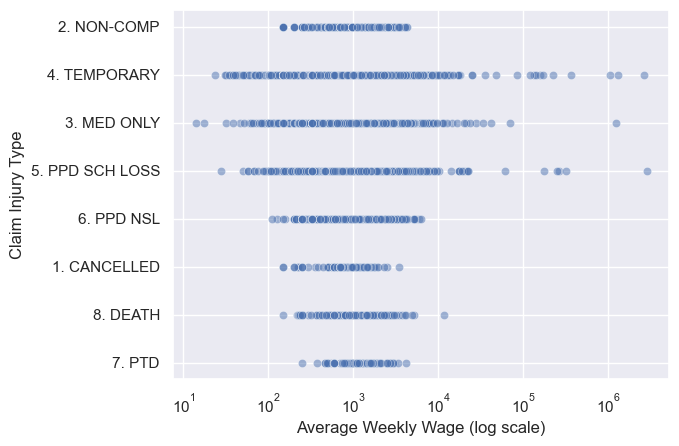

In [95]:
sns.set_theme()
sns.scatterplot(wcb,
                x="Average Weekly Wage",
                y="Claim Injury Type", 
                alpha=.5,
               )
plt.xscale('log')
plt.xlabel('Average Weekly Wage (log scale)')
plt.show()

>It is interesting to see that (NON-COMP) claim type comprises 50% of the data, yet its distribution is quite narrow, ranging from approximately 100 to 10,000 dollars. This is in contrast to (TEMPORARY), which accounts for 26% of the data and has a broader range, from 30 to 31,622 dollars. Additionally, the claim injury types with the lowest frequencies, such as (DEATH), (PTD), and (PPD NSL), also have a narrow distribution with a similar range to NON-COMP.


### Mean of <code>Average Weekly Wage</code> per <code>Industry Code</code>

In [96]:
industry_avg_wage = wcb.groupby('Industry Code')['Average Weekly Wage'].mean().reset_index()

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the barplot for Industry Code vs. Average Weekly Wage
sns.set_theme()
sns.barplot(data=industry_avg_wage, x='Industry Code', y='Average Weekly Wage', ax=ax)
ax.set_title('Mean of AWW per Industry Code')
ax.set_xlabel('Industry Code')
ax.set_ylabel('Mean of AWW')

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

>The average weekly wage shows a moderate deviation between industries, with some industries being noticeably higher or lower than the average. More specifically, the Utilities Industry (22), Information (51), and Public Administration (92) industries have the highest mean average weekly salaries. \
>On the other hand, the Retail Trade (44 and 45) and Accommodation and Food Services Industry (72) have the lowest values for mean AWW.

### <code>'Claim Injury Type'</code> per <code>'Industry Code'</code>


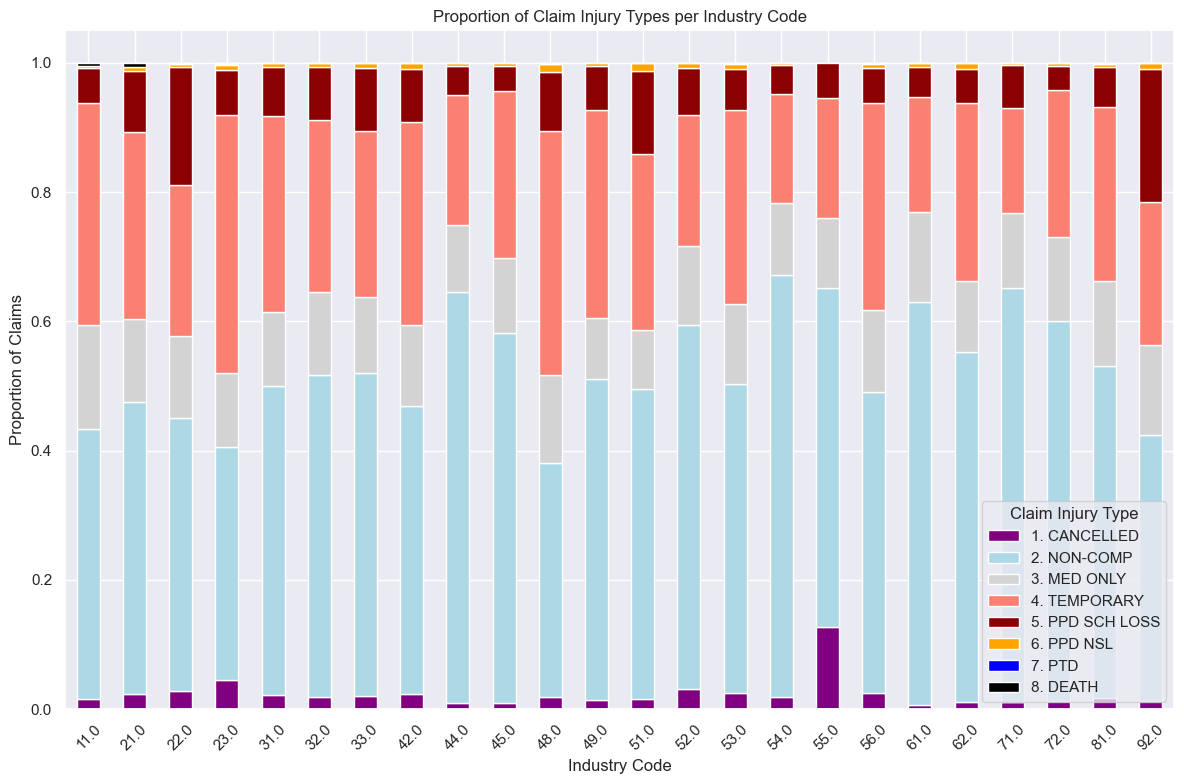

In [97]:
injury_counts = wcb.groupby(['Industry Code', 'Claim Injury Type']).size().unstack(fill_value=0)
injury_counts_prop = injury_counts.div(injury_counts.sum(axis=1), axis=0)  # Normalize to get proportions

# Set up the figure
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the stacked bar chart with proportions
injury_counts_prop.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Add title and labels
ax.set_title('Proportion of Claim Injury Types per Industry Code')
ax.set_xlabel('Industry Code')
ax.set_ylabel('Proportion of Claims')

# Rotate x-axis labels for readability
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

>There is a general pattern that we can notice: throughout all industries, the most common claim types are (NON-COMP), (TEMPORARY), and (MED-ONLY), while the rarest seem to be (DEATH) and (PTD). \
>There is a noticeably larger portion of (CANCELLED) claims in the Management of Companies and Enterprises Industry (55). In addition, in the Public Administration Industry (92) and Utilities Industry (22), there is a higher portion of claims classified as (PPD SCH LOSS).

In [98]:
codes_to_filter = [22,62, 51, 44,72,92]

# Loop through the codes to print the description of the first row that matches each code (we do this because we know each codes has only one description)
for code in codes_to_filter:
    description = wcb[wcb['Industry Code'] == code].iloc[0]['Industry Code Description']
    print(f"Industry Code:",code," Description:",description)

Industry Code: 22  Description: UTILITIES
Industry Code: 62  Description: HEALTH CARE AND SOCIAL ASSISTANCE
Industry Code: 51  Description: INFORMATION
Industry Code: 44  Description: RETAIL TRADE
Industry Code: 72  Description: ACCOMMODATION AND FOOD SERVICES
Industry Code: 92  Description: PUBLIC ADMINISTRATION


### <code>Claim Injury Type</code> by <code>County of Injury</code>


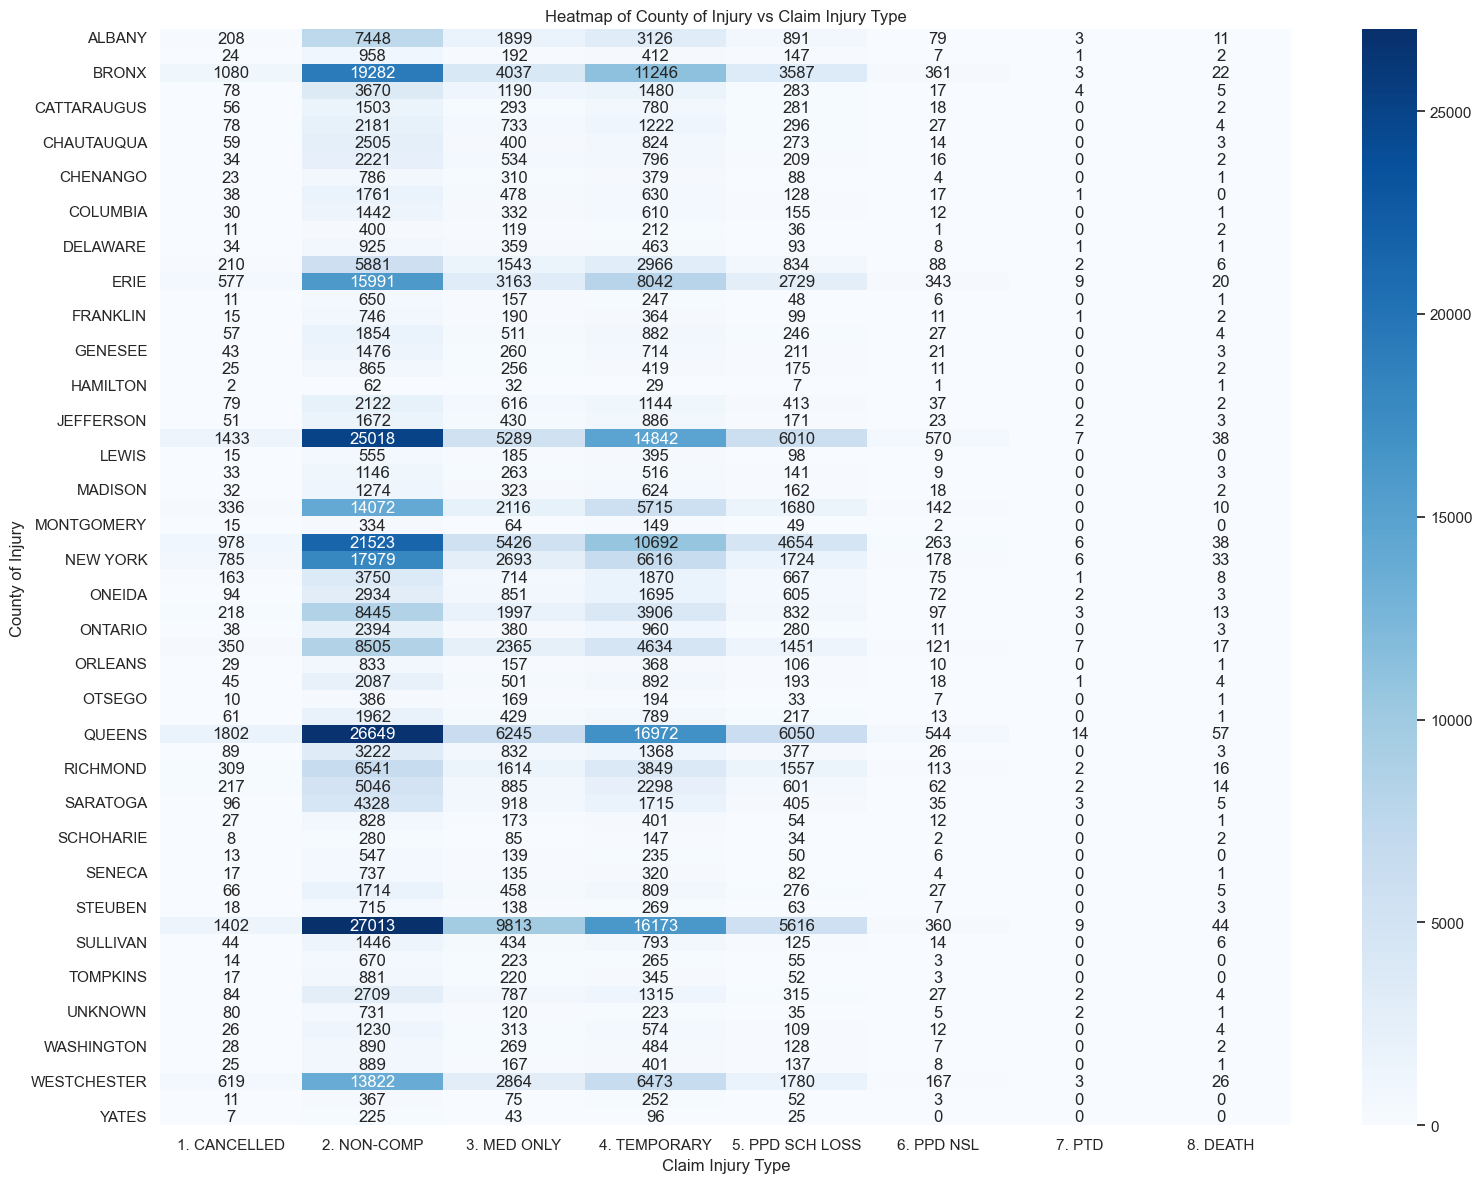

In [99]:
# Heatmap 
contingency_table_county = pd.crosstab(wcb['County of Injury'], wcb['Claim Injury Type'])
plt.figure(figsize=(16, 12))
sns.heatmap(contingency_table_county, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of County of Injury vs Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('County of Injury')
plt.tight_layout()

plt.show()

>Bronx, Kings, Nassau, Suffolk, Queens, and Westchester have significantly higher numbers of claims across various injury types, which may be due to factors such as population density or a specific industry prevalent in those counties. (NON-COMP) and (TEMPORARY) claims are the most dominant, followed by (MED ONLY) and (PPD NSL), with (CANCELLED) claims being the least common. (PPD SCH LOSS), (DEATH), and (PTD) have very few data points.

### <code>Industry Code</code> per <code>County of Injury</code>


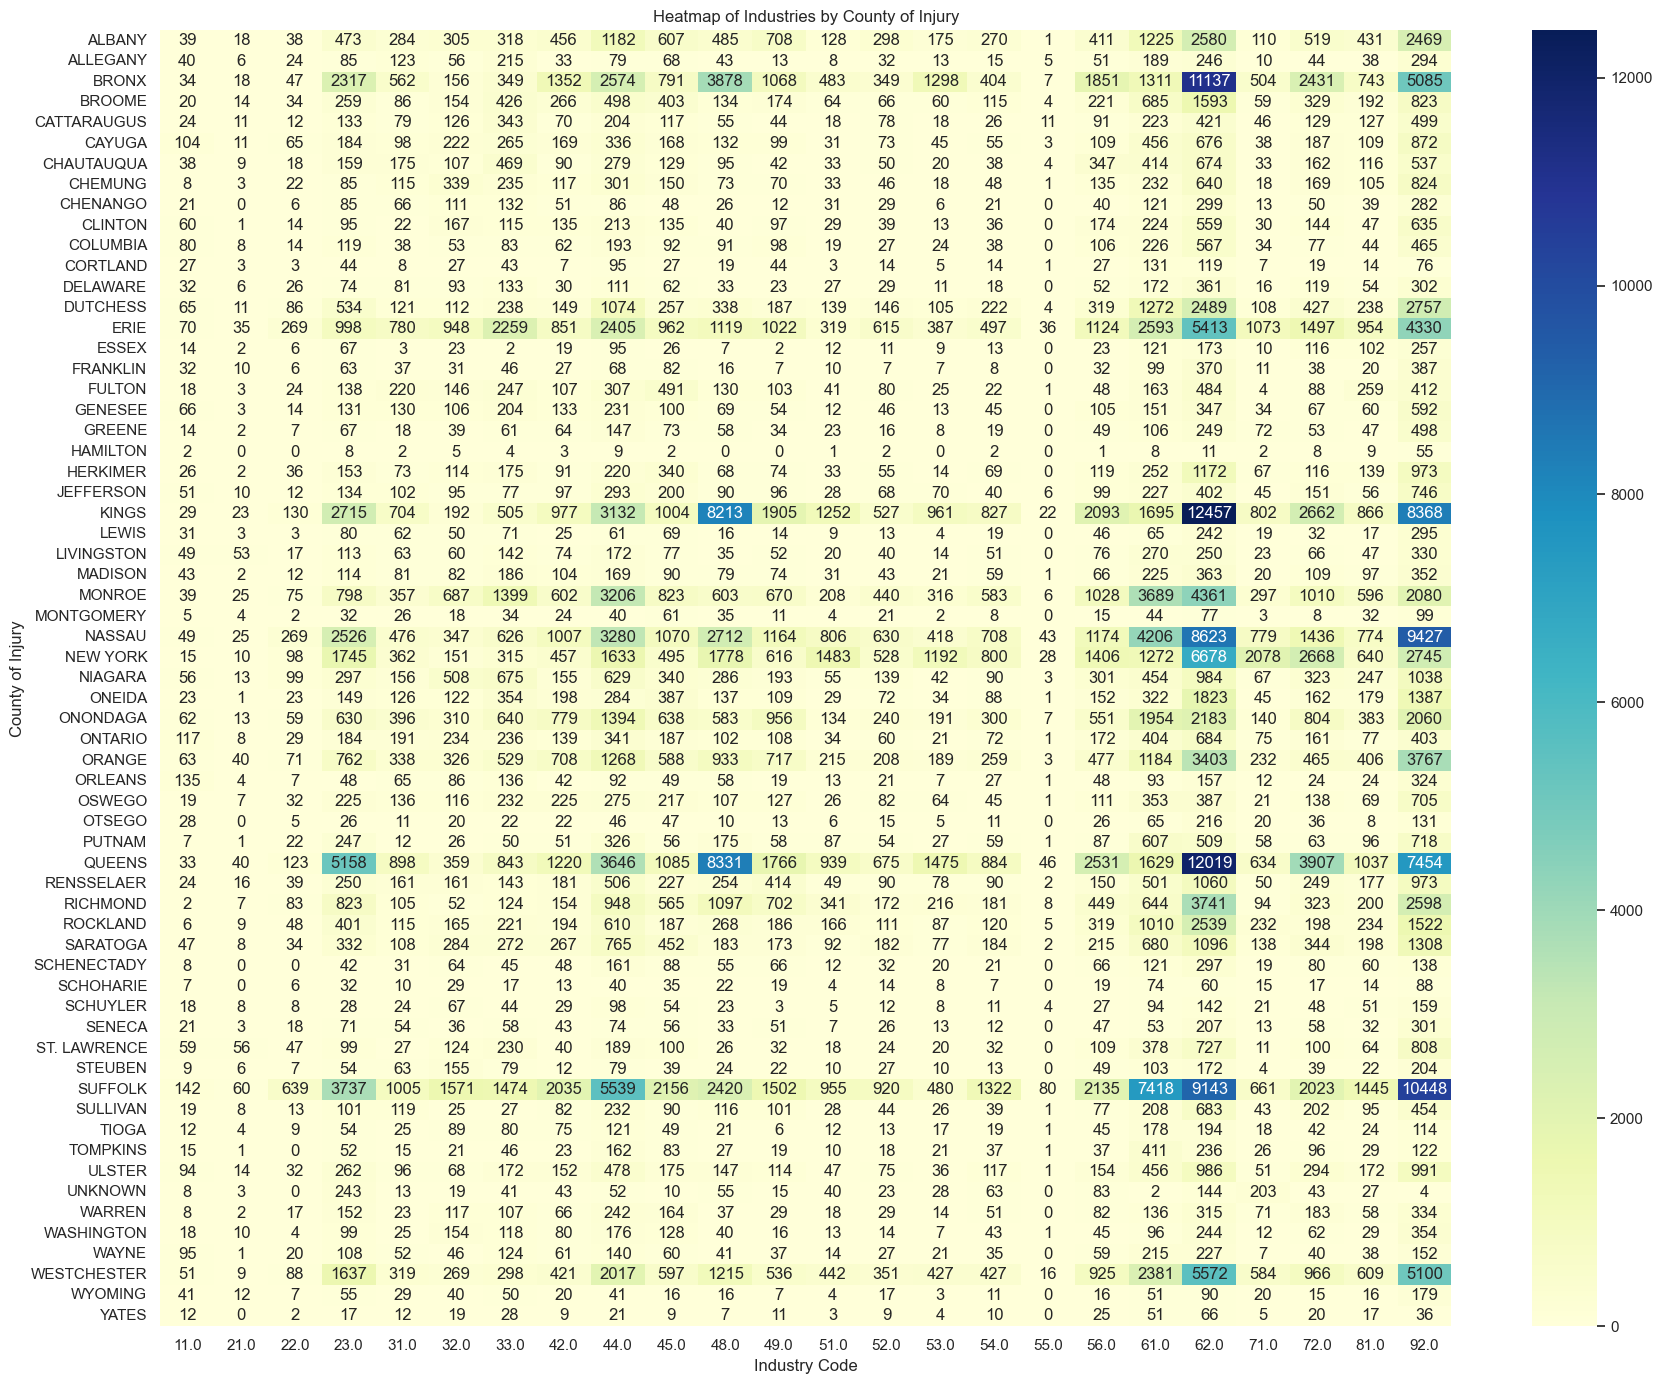

In [100]:
industry_counts = wcb.groupby(['County of Injury', 'Industry Code'], observed=False).size().reset_index(name='Count')
pivot_data = industry_counts.pivot(index="County of Injury", columns="Industry Code", values="Count").fillna(0)

plt.figure(figsize=(18, 14))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Industries by County of Injury')
plt.xlabel('Industry Code')
plt.ylabel('County of Injury')
plt.tight_layout()

plt.show()

>The Health Care and Social Assistance Industry (62) is dominant in most counties, with the highest frequency observed in Queens, Kings, and The Bronx. Other notable industries include Public Administration (92), Educational Services (61), Transportation and Warehousing (48), Retail Trade (44), Construction (23), and Accommodation and Food Services (72). \
>Most industries are concentrated in specific counties, such as Westchester, Suffolk, Richmond, Queens, New York, Nassau, Monroe, Kings, Erie, Dutchess, Bronx, and Albany. \
>It is interesting to note that while industry 72 holds a relatively low overall claim count, it is concentrated in specific areas, including Queens, New York, Kings, and Suffolk.


### <code>Claim Injury Type</code> per <code>WCIO Nature of Injury Code</code>


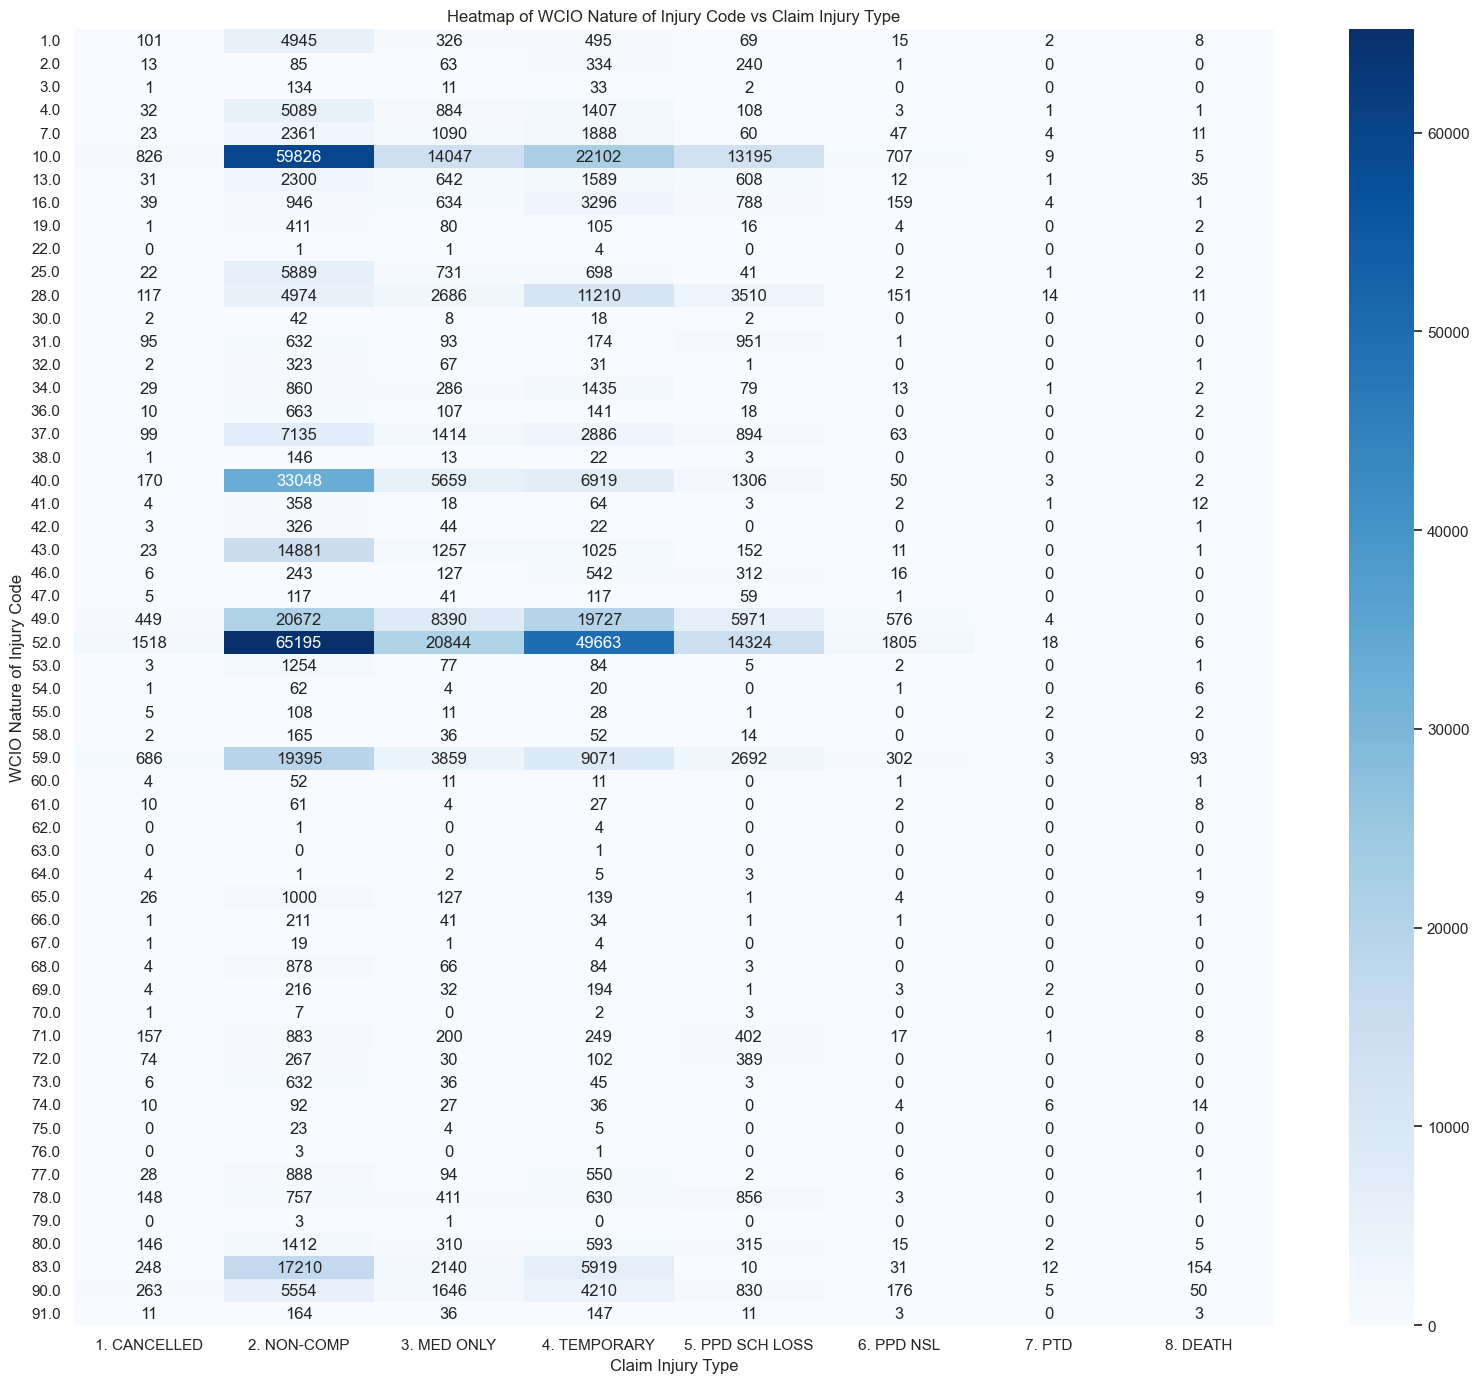

In [101]:
# Heatmap for WCIO Nature of Injury Code vs Claim Injury Type
contingency_table_wc_io = pd.crosstab(wcb['WCIO Nature of Injury Code'], wcb['Claim Injury Type'])
plt.figure(figsize=(16, 14))
sns.heatmap(contingency_table_wc_io, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of WCIO Nature of Injury Code vs Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('WCIO Nature of Injury Code')
plt.tight_layout()

plt.show()

>Injuries of types 52, 10, and 49 have high counts across multiple claim types, suggesting that claimants with these injuries frequently apply for compensation. However, most often, they receive a (NON-COMP) classification, followed by a (TEMPORARY), and lastly a (MED-ONLY) claim classification.

>(DEATH) claims are rare, although there is a relatively high number associated with injury type 83.


In [102]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins=False)
    categories = cont_tab.index
    sns.set_theme()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 11))
    bottom = np.zeros(len(categories))  

    for i, target_class in enumerate(cont_tab.columns):
        ax1.bar(categories, cont_tab[target_class].values, 0.55, label=f'Class {target_class}', bottom=bottom, color=colors[i])
        bottom += cont_tab[target_class].values  


    ax1.set_title("Frequency Bar Chart")
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Frequency")
    ax1.legend(title=target)

    # Proportion Bar Chart
    proportions = cont_tab.div(cont_tab.sum(axis=1), axis=0)
    bottom = np.zeros(len(categories))  

    for i, target_class in enumerate(cont_tab.columns):
        ax2.bar(categories, proportions[target_class].values, 0.55, label=f'Class {target_class}', bottom=bottom, color=colors[i])
        bottom += proportions[target_class].values  

    ax2.set_title("Proportion Bar Chart")
    ax2.set_xlabel("features")
    ax2.set_ylabel("Proportion")
    ax2.legend(title=target)

    plt.tight_layout()

    plt.show()

### <code>Claim Injury Type</code> by <code>Gender</code>


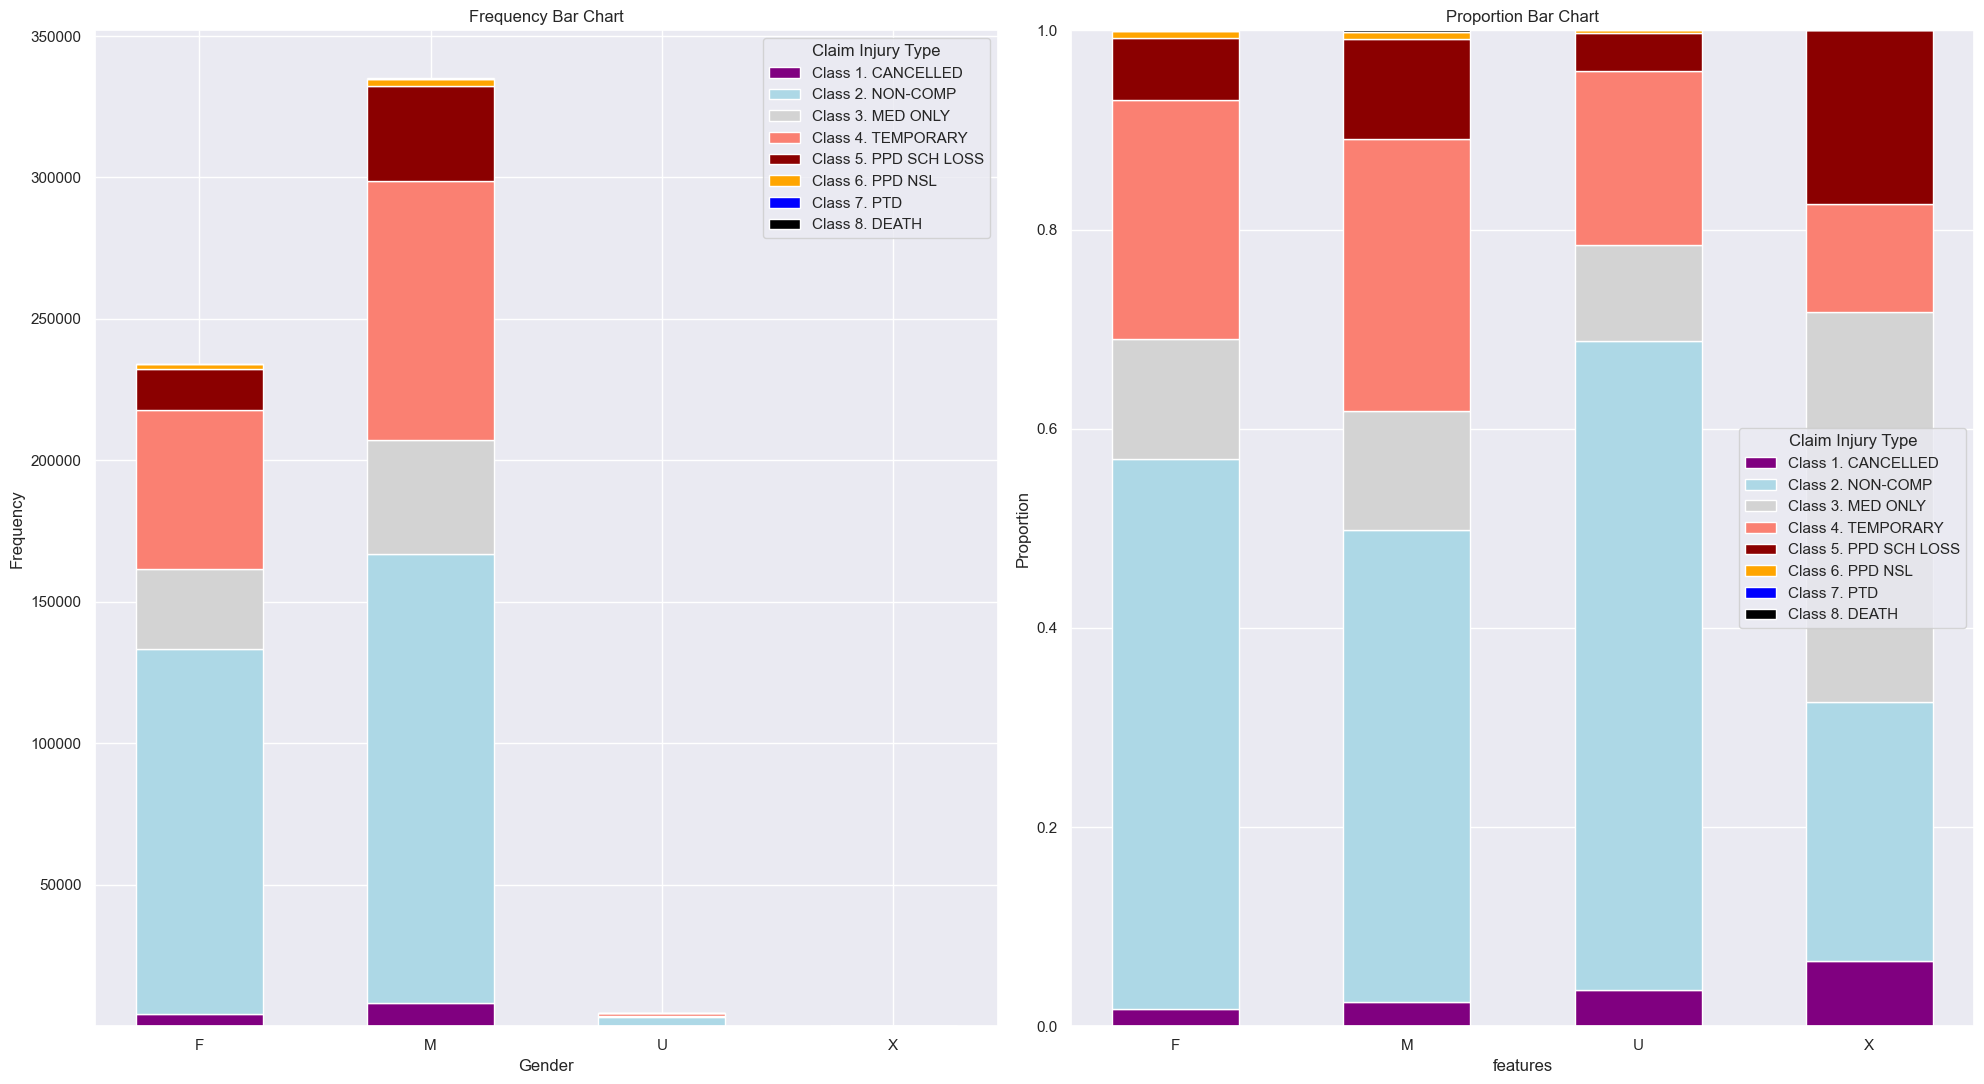

In [103]:
bar_charts_categorical(wcb, 'Gender', "Claim Injury Type")

The proportion of claim injury types appears to be consistent across genders in the dataset. The only noticeable difference is in gender 'X', which has a higher percentage of cases classified as Cancelled, Permanent Partial Scheduled Loss, and Medical Benefits Only. The remaining claim injury types are represented in smaller proportions.

### <code>Claim Injury Type</code> by <code>District Name</code>


In [104]:
bar_charts_categorical(wcb, 'District Name', "Claim Injury Type")

The proportion of claim injury types seems to be mostly consistent across all districts in the dataset. However, in Rochester, we observe a higher percentage of the 'Non-Comp' claim injury type, while in Statewide, the percentages of 'Temporary' and 'Death' claim injury types are higher compared to the other districts.

### <code>Claim Injury Type</code> by <code>Agreement Reached</code>

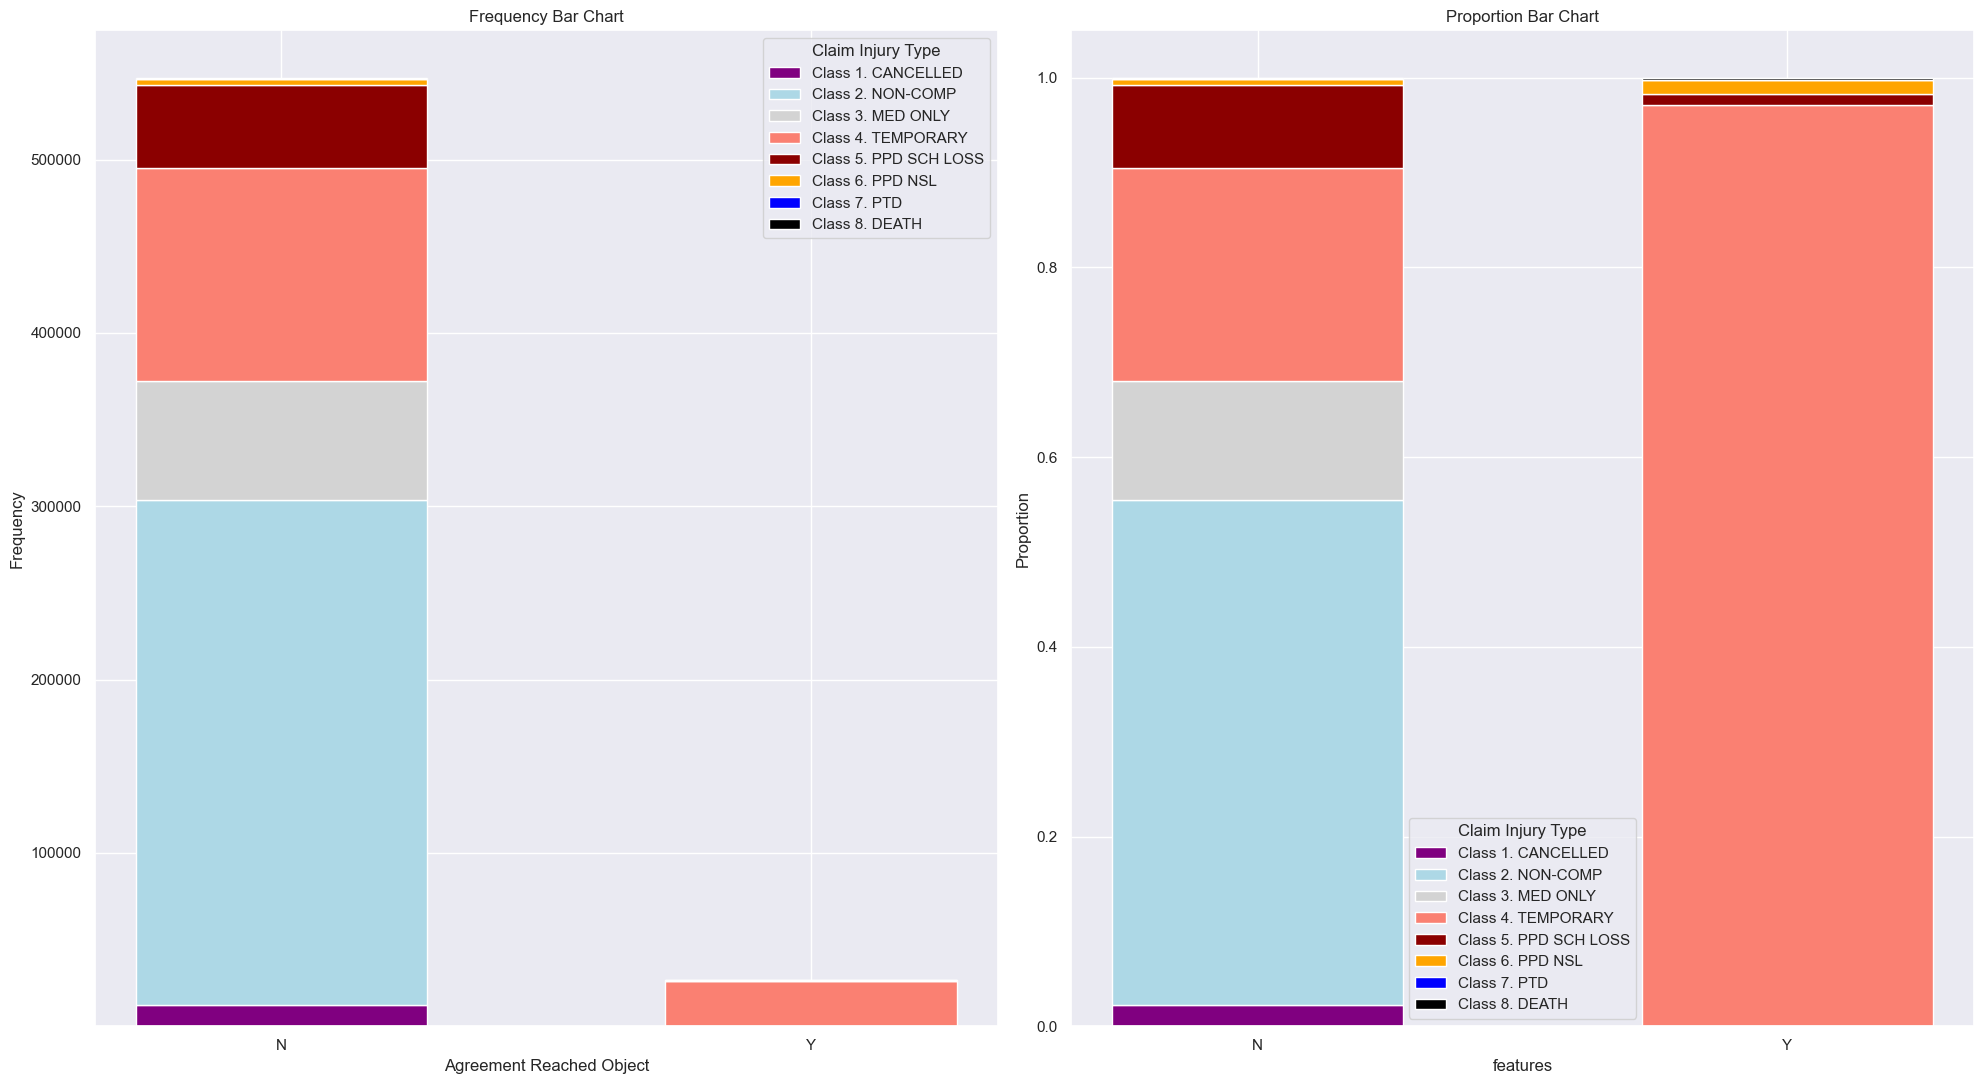

In [105]:
wcb['Agreement Reached Object'] = wcb['Agreement Reached'].apply(lambda x: 'Y' if x == 1 else 'N') #For vizualization purposes
bar_charts_categorical(wcb, 'Agreement Reached Object', "Claim Injury Type")

>If an agreement outside the WCB has been reached, nearly 90% of the cases are classified as TEMPORARY. However, it is important to note that the 'Agreement Reached' variable is imbalanced, meaning there may be very few cases where an agreement has been reached, which further exaggerates this difference.

### <code>Claim Injury Type</code> by <code>Alternative Dispute Resolution</code>

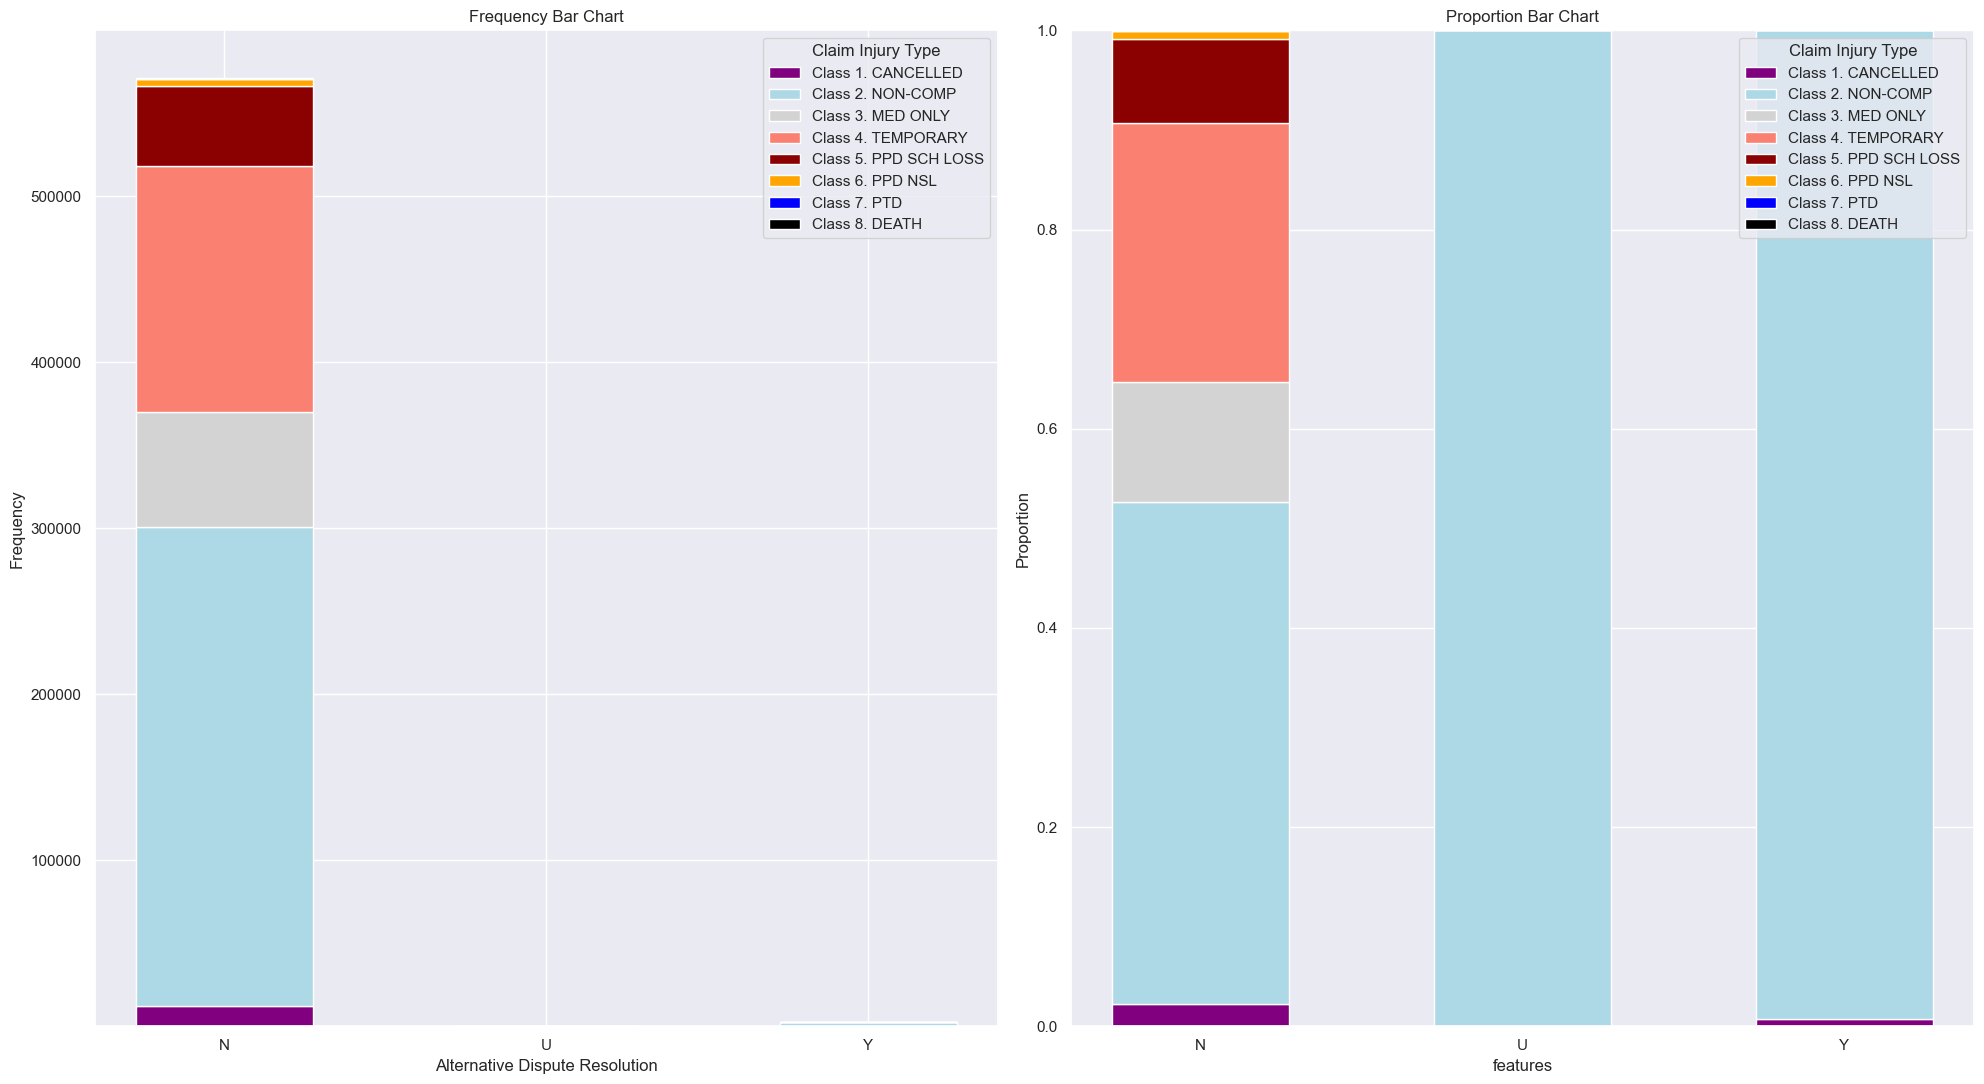

In [106]:
bar_charts_categorical(wcb, 'Alternative Dispute Resolution', "Claim Injury Type")

>If an alternative dispute resolution has been reached, almost all of the cases are classified as NON-COMP, with a few being CANCELLED. However, we have to mention that the proportion of agreements with an alternative dispute resolution reached is only 0.5%, as seen in the previous bar plot for that variable. \
>If a resolution has not been reached, the general pattern of claim injury type distribution remains the same.

In [107]:
wcb["Agreement Reached"]

0         0.0
1         1.0
2         0.0
3         NaN
4         0.0
         ... 
593466    NaN
593467    0.0
593468    NaN
593469    NaN
593470    NaN
Name: Agreement Reached, Length: 593471, dtype: float64